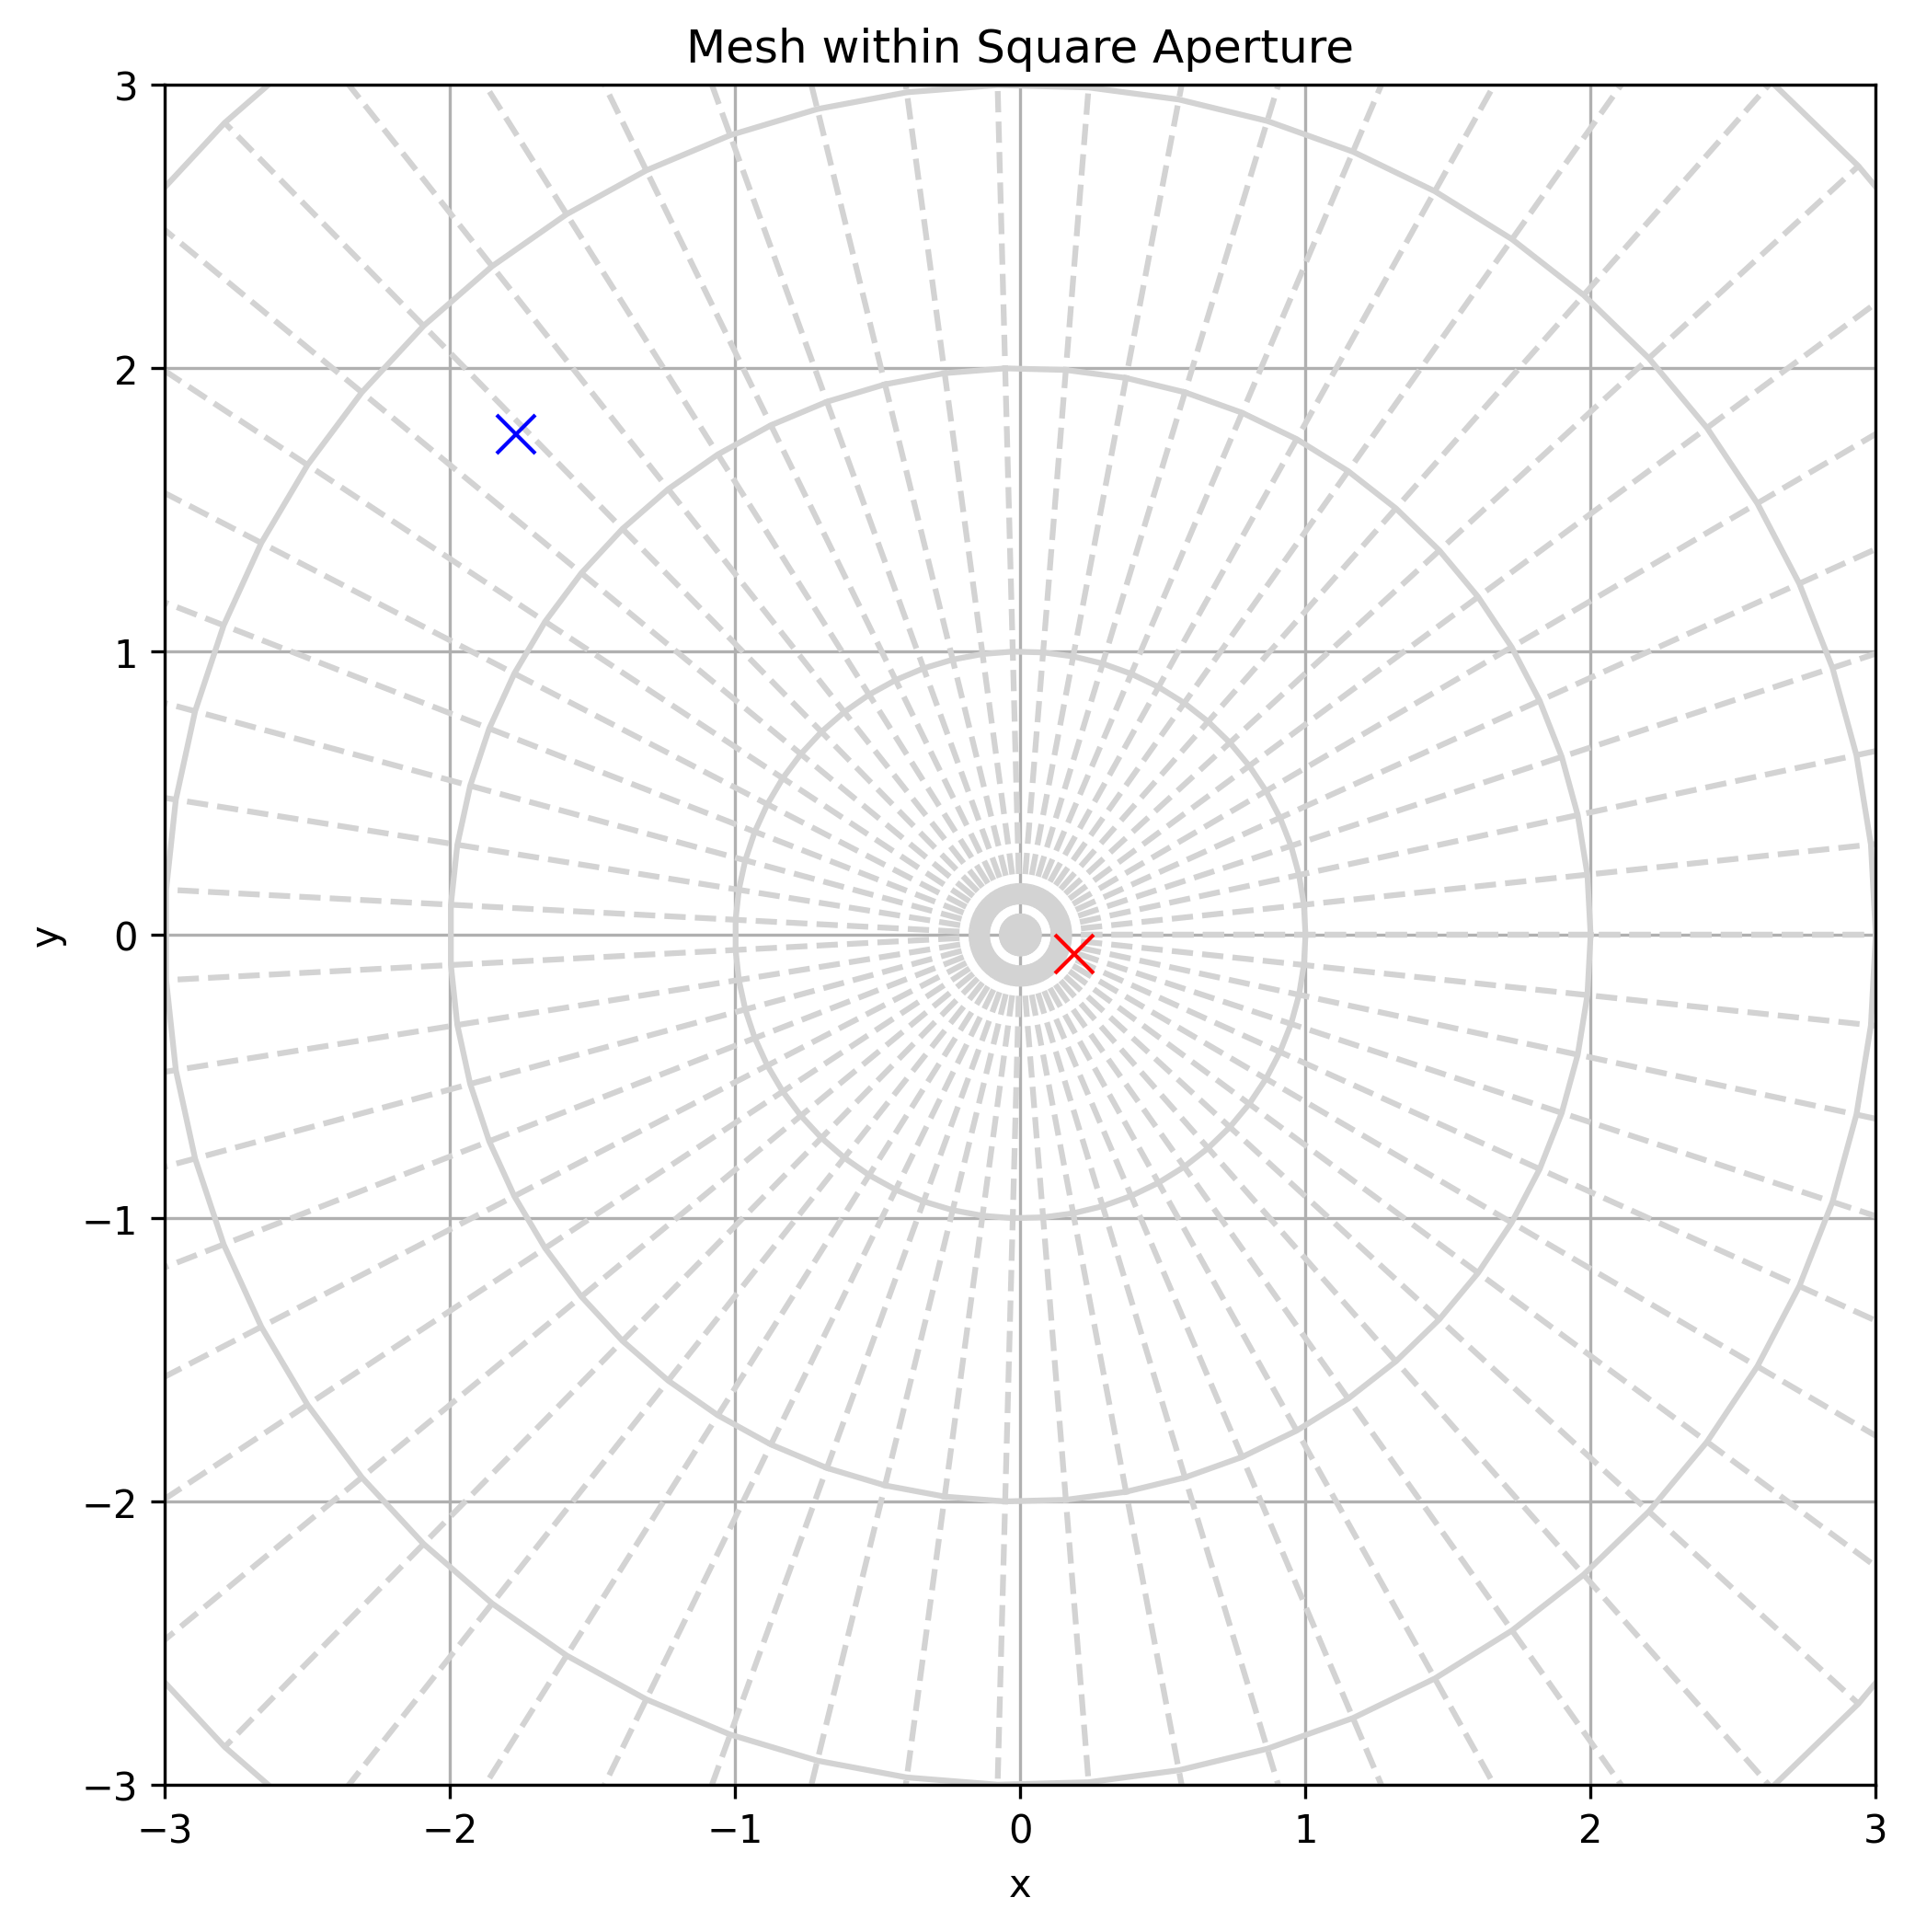

r_filtered = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4.
 4. 4.]
theta_filtered = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Define the list of angles (in degrees) and radii
angles_deg = np.linspace(0, 360, 60)  # 60 angles from 0 to 360 degrees
radii = np.linspace(0, 4, 5)  # 20 radii from 0 to 5

dot_A_rt=[0.2,np.radians(-20)]
dot_B_rt=[2.5,np.radians(135)]

# Convert angles to radians
angles_rad = np.radians(angles_deg)

# Convert polar coordinates to Cartesian coordinates
x = np.outer(radii, np.cos(angles_rad))
y = np.outer(radii, np.sin(angles_rad))

# Define the aperture size A
A = 3

# Filter points within the square aperture
mask = (x > -A) & (x < A) & (y > -A) & (y < A)
x_filtered = x[mask]
y_filtered = y[mask]

r_filtered = np.sqrt(x_filtered**2 + y_filtered**2)
theta_filtered = np.arctan2(y_filtered, x_filtered)

# Ensure theta is in the range [0, 2*pi)
theta_filtered = np.mod(theta_filtered, 2 * np.pi)

# Plot the mesh
plt.figure(figsize=(8, 8))

# Plot circular lines (solid)
for r in radii:
    x_circle = r * np.cos(angles_rad)
    y_circle = r * np.sin(angles_rad)
    plt.plot(x_circle, y_circle, color='lightgrey')

# Plot radii lines (dashed)
for angle in angles_rad:
    x_line = radii * np.cos(angle)
    y_line = radii * np.sin(angle)
    plt.plot(x_line, y_line, linestyle='--', color='lightgrey')

plt.plot(dot_A_rt[0]*np.cos(dot_A_rt[1]),dot_A_rt[0]*np.sin(dot_A_rt[1]),'rx', markersize=10)
plt.plot(dot_B_rt[0]*np.cos(dot_B_rt[1]),dot_B_rt[0]*np.sin(dot_B_rt[1]),'bx', markersize=10)

# Set plot limits and labels
plt.xlim(-A, A)
plt.ylim(-A, A)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mesh within Square Aperture')
# plt.grid(True)
plt.show()

print('r_filtered =', r_filtered)
print('theta_filtered =', theta_filtered)


dot_A_transform = [1.353087510444614, -0.3934550707229767]
dot_B_transform = [1.2697842780130701, -0.8925924435368852]


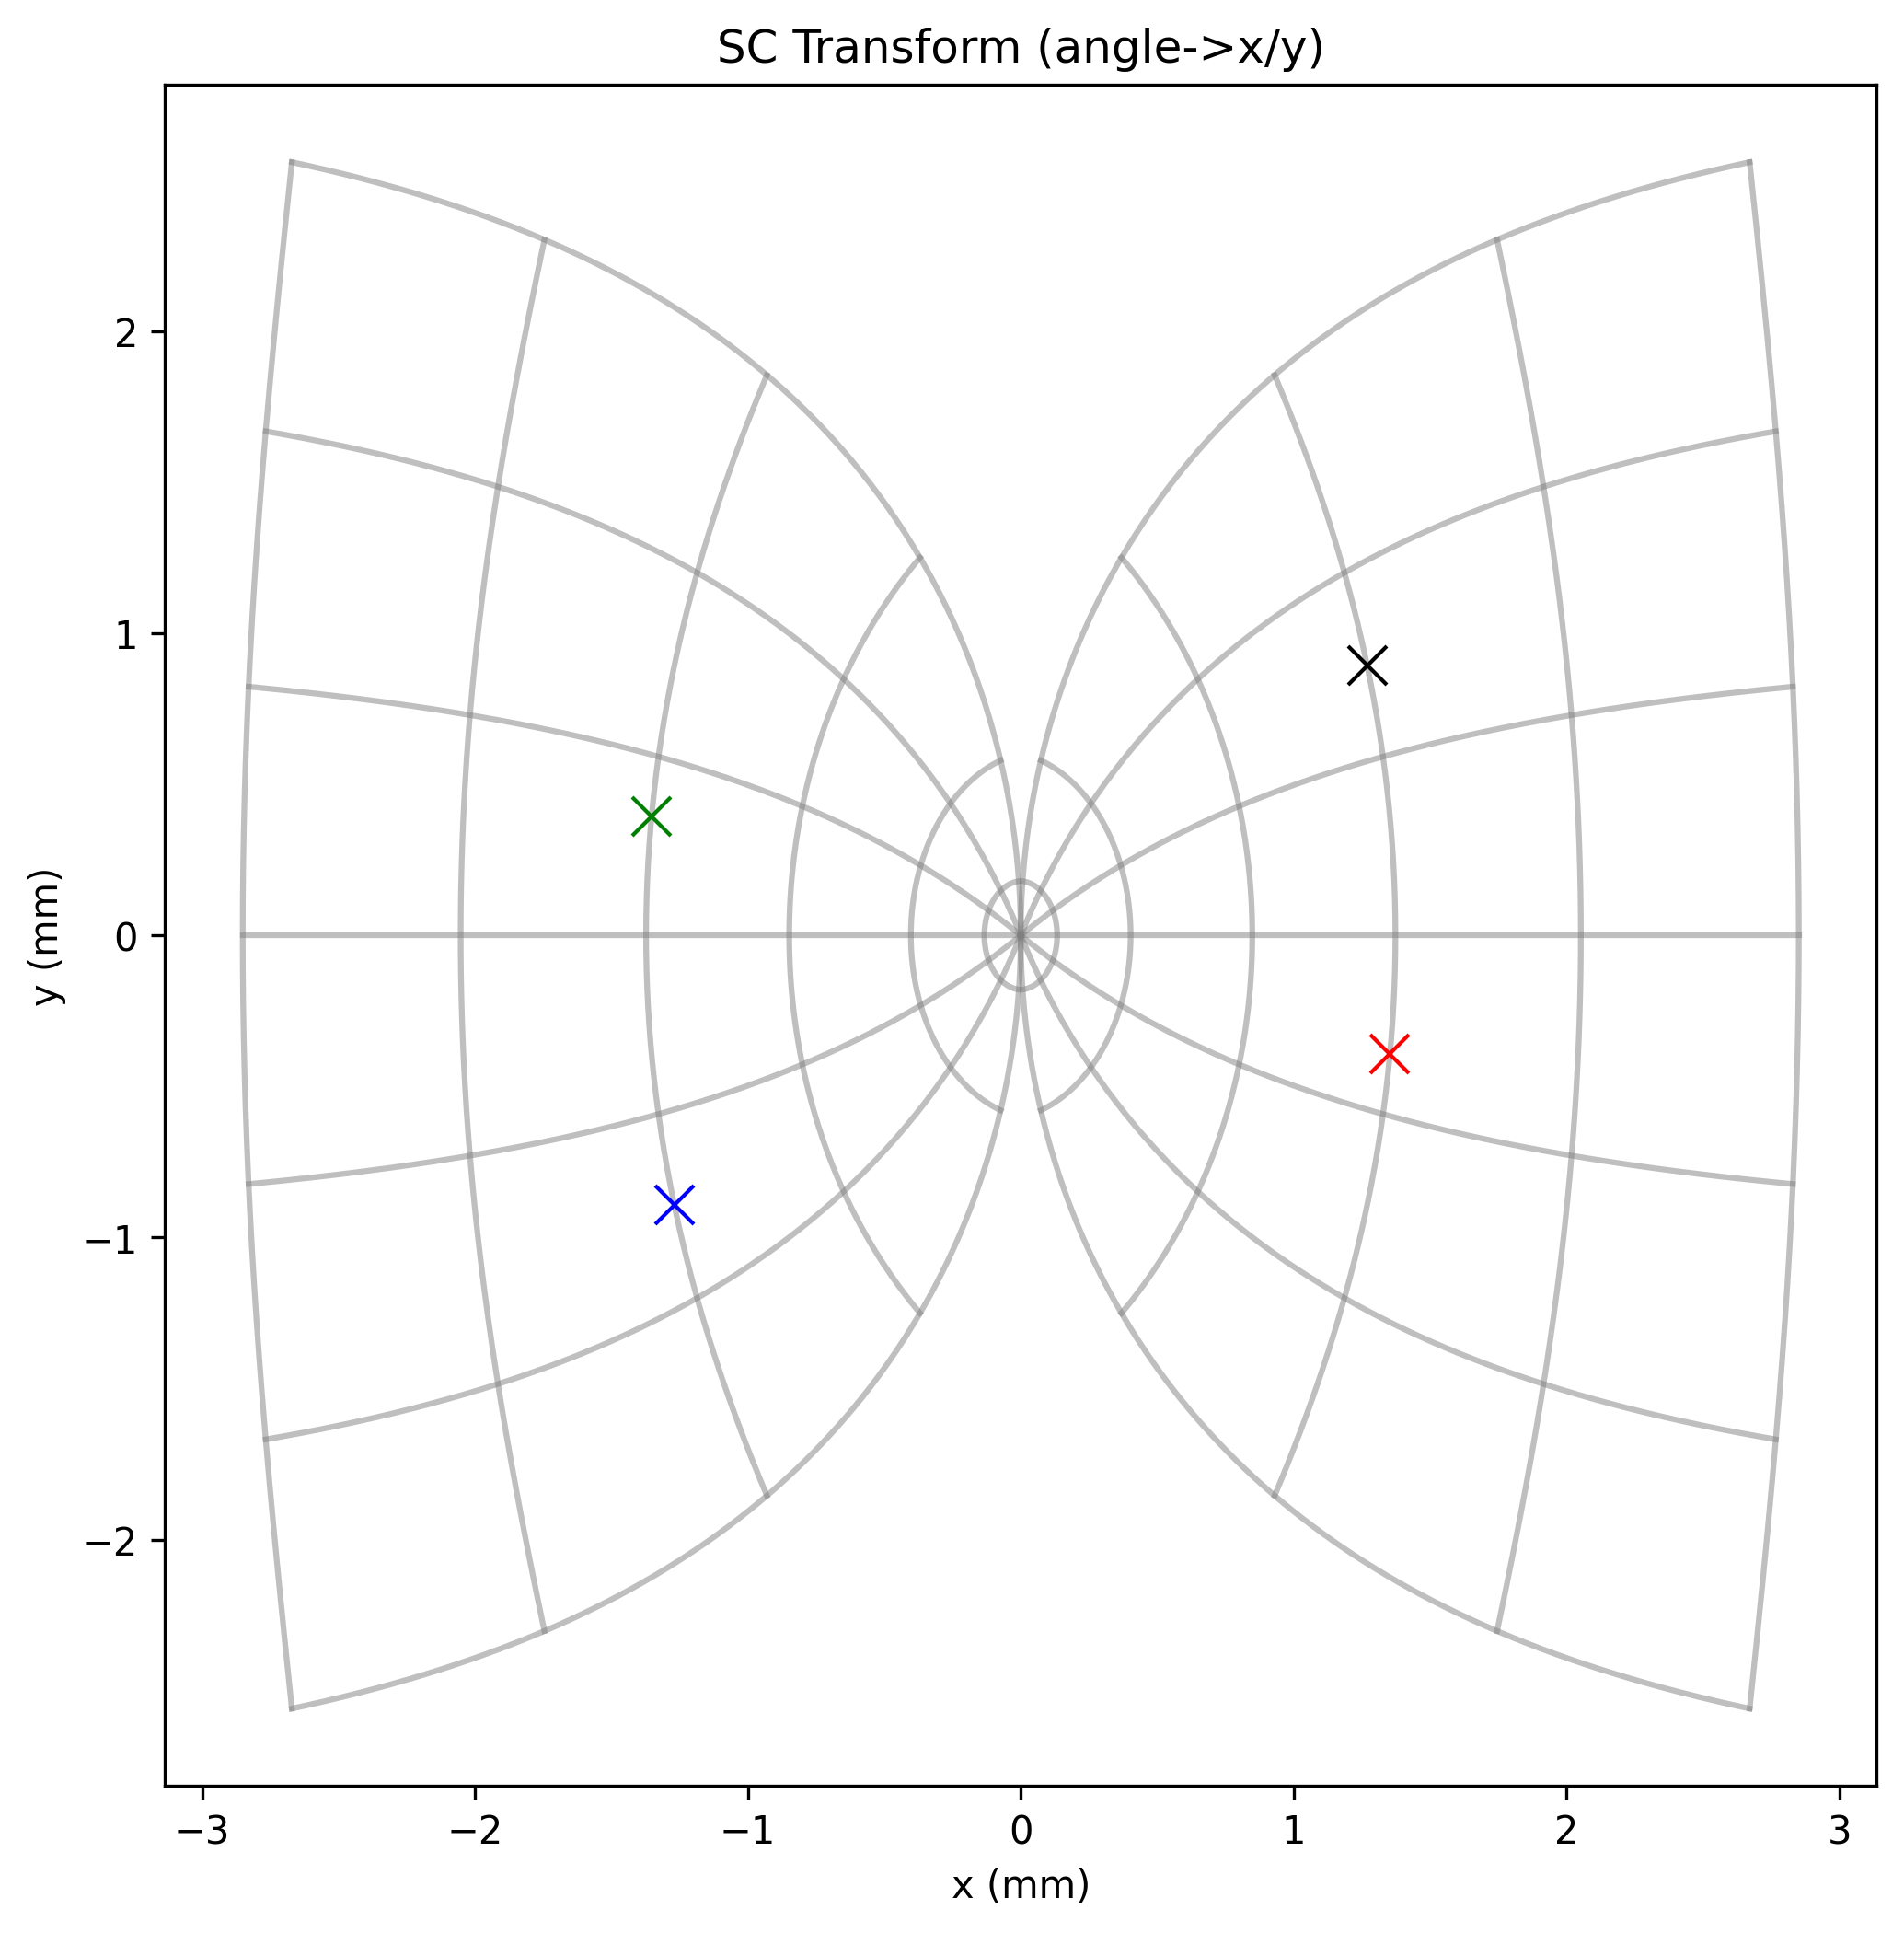

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

def x_transform(r, theta, Bx, A):
    return Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta) + A**2) / A)

def y_transform(r, theta, By, A):
    return By * np.arctan2(r * np.sin(theta), (r * np.cos(theta) + A))

# Constants for the transformation
A = 3
Bx = 1.4
By = 1.8

# dots
dot_A_rt=[5,np.radians(-20)]
dot_C_rt=[5,np.radians(45)]
dot_B_rt_=[5,np.radians(135 - 180)]
dot_D_rt_=[5,np.radians(200 - 180)]


dot_A_transform = [x_transform(dot_A_rt[0],dot_A_rt[1],Bx,A),y_transform(dot_A_rt[0],dot_A_rt[1],By,A)]
dot_C_transform = [x_transform(dot_C_rt[0],dot_C_rt[1],Bx,A),y_transform(dot_C_rt[0],dot_C_rt[1],By,A)]
dot_B_transform = [x_transform(dot_B_rt_[0],dot_B_rt_[1],Bx,A),y_transform(dot_B_rt_[0],dot_B_rt_[1],By,A)]
dot_D_transform = [x_transform(dot_D_rt_[0],dot_D_rt_[1],Bx,A),y_transform(dot_D_rt_[0],dot_D_rt_[1],By,A)]

# Define discrete radii and angles
R = np.array([0, 0.3, 1, 2.5, 5, 10, 20]) # np.logspace(-1,1,8)
Theta =  np.radians([-90, -60, -30, 0, 30, 60, 90]) # np.radians([90,120,150,180,210,240,270])

# Define fine linspace for all radii and angles
r_all = np.linspace(0, 20, 300)
theta_all = np.linspace(-np.pi/2, np.pi/2, 300)

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot lines for each radius over all angles
for r in R:
    X = x_transform(r, theta_all, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y = y_transform(r, theta_all, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(X, Y, 'grey', alpha=0.5)
    plt.plot(-X, Y, 'grey', alpha=0.5)

# Plot lines for each angle over all radii
for theta in Theta:
    X = x_transform(r_all, theta, Bx, A) # Bx * np.log(np.sqrt(r_all**2 + 2 * A * r_all * np.cos(theta) + A**2) / A)
    Y = y_transform(r_all, theta, By, A) # By * np.arctan2(r_all * np.sin(theta), (r_all * np.cos(theta) + A))
    plt.plot(X, Y, 'grey', alpha=0.5)
    plt.plot(-X, Y, 'grey', alpha=0.5)

print('dot_A_transform =', dot_A_transform)
print('dot_B_transform =', dot_B_transform)

plt.plot(dot_A_transform[0],dot_A_transform[1],'rx', markersize=10)
plt.plot(dot_C_transform[0],dot_C_transform[1],'kx', markersize=10)
plt.plot(-dot_B_transform[0],dot_B_transform[1],'bx', markersize=10)
plt.plot(-dot_D_transform[0],dot_D_transform[1],'gx', markersize=10)

# Labeling and title
plt.title('SC Transform (angle->x/y)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

def x_transform(r, theta, Bx, A):
    return Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta) + A**2) / A)

def y_transform(r, theta, By, A):
    return By * np.arctan2(r * np.sin(theta), (r * np.cos(theta) + A))

# Constants for the transformation
A = 3
Bx = 1.4
By = 1.8

# dots
dot_A_rt=[0.2,np.radians(-20)]
dot_B_rt=[2.5,np.radians(90)]

dot_A_transform = [x_transform(dot_A_rt[0],dot_A_rt[1],Bx,A),y_transform(dot_A_rt[0],dot_A_rt[1],By,A)]
dot_B_transform = [x_transform(dot_B_rt[0],dot_B_rt[1],Bx,A),y_transform(dot_B_rt[0],dot_B_rt[1],By,A)]

# Define discrete radii and angles
R = np.array([0, 0.3, 1, 2.5, 5, 10, 20]) # np.logspace(-1,1,8)
Theta1 =  np.radians([-90, -60, -30, 0, 30, 60, 90]) # np.radians([90,120,150,180,210,240,270])
Theta2 =  np.radians([90,120,150,180,210,240,270])

# Define fine linspace for all radii and angles
r_all = np.linspace(0, 20, 300)
theta_all1 = np.linspace(-np.pi/2, np.pi/2, 300)
theta_all2 = np.linspace(np.pi/2, 3*np.pi/2, 300)

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot lines for each radius over all angles
for r in R:
    X1 = x_transform(r, theta_all1, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y1 = y_transform(r, theta_all1, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(X1, Y1, 'grey', alpha=0.5)
for r in R:
    X2 = x_transform(r, theta_all2, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y2 = y_transform(r, theta_all2, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(-X2, Y2, 'grey', alpha=0.5)

# Plot lines for each angle over all radii
for theta in Theta1:
    X1 = x_transform(r_all, theta, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y1 = y_transform(r_all, theta, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(X1, Y1, 'grey', alpha=0.5)
for theta in Theta2:
    X2 = x_transform(r_all, theta, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y2 = y_transform(r_all, theta, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(-X2, Y2, 'grey', alpha=0.5)

print('dot_A_transform =', dot_A_transform)
print('dot_B_transform =', dot_B_transform)

# plt.plot(dot_A_transform[0],dot_A_transform[1],'rx', markersize=10)
# plt.plot(dot_B_transform[0],dot_B_transform[1],'bx', markersize=10)

# Labeling and title
plt.title('SC Transform (angle->x/y)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# Show the plot
plt.show()


(0.246826829897687, -0.7853981633974483)
[5, -0.7853981633974483]
(0.7456049832925898, 0.3587706702705722)
(0.3902674850578181, -5.176036589385496)
(0.9756687126445454, 0.4636476090008061)
(1.0176930909045265, -5.742765806909002)


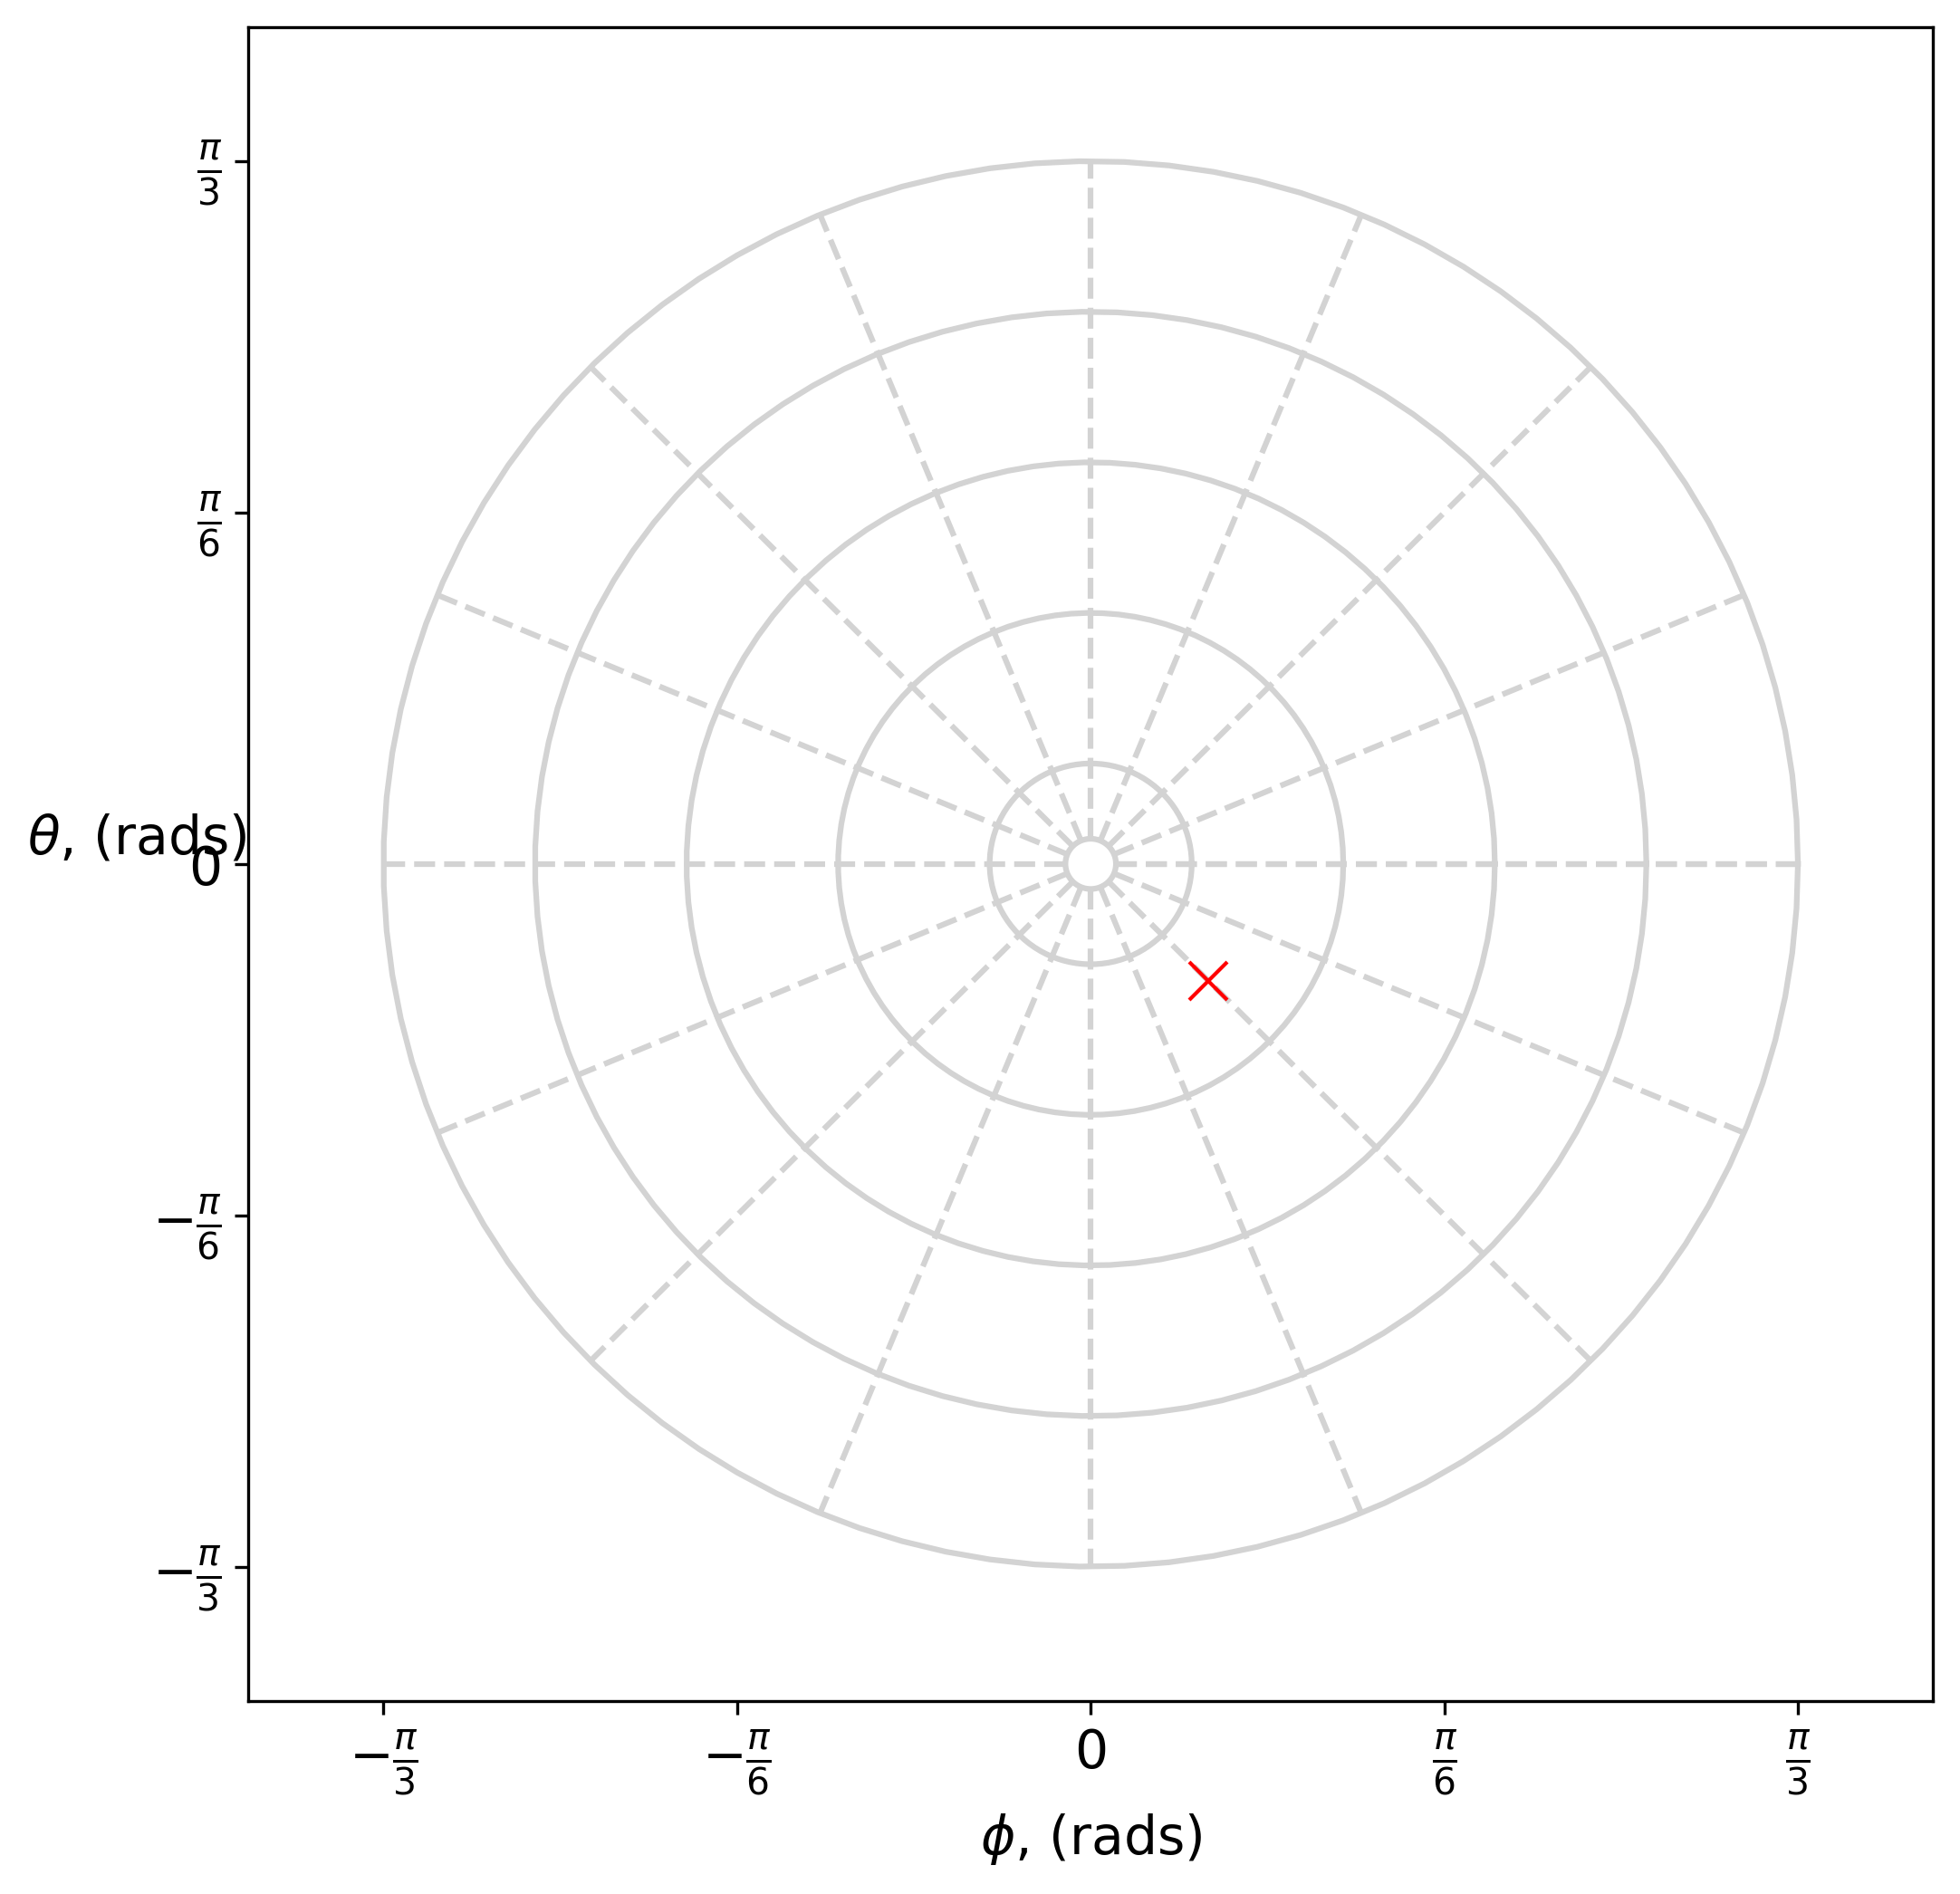

In [152]:
# final grid

import numpy as np
import matplotlib.pyplot as plt

def x_y_to_polar(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta
def x_y_to_polar_(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta - np.pi

AP = np.pi/3
R_dots = 5
Theta_dots = 17
T = 100
F = 7

# Define the list of angles (in degrees) and radii
angles = np.linspace(0, 2*np.pi, Theta_dots)
# radii = np.logspace(-0.5,1,R_dots)
radii = np.linspace(AP/F, AP, R_dots)
step_size = (AP - AP/F) / (R_dots - 1)
new_value = radii[0] - 0.5 * step_size
radii = np.insert(radii, 0, new_value)

angles_full = np.linspace(0, 2*np.pi, T)
radii_full = np.linspace(AP/F - step_size/2, AP, T)

dot_A_r=[np.radians(10),np.radians(-10)] # [np.radians(15),np.radians(-10)]
dot_B_r=[np.radians(-40),np.radians(80)]
# dot_C_r=[np.radians(40),np.radians(15)]
# dot_D_r=[np.radians(-10),np.radians(-20)]
# dot_E_r=[np.radians(50),np.radians(25)]
# dot_F_r=[np.radians(-50),np.radians(-30)]
# dot_B_r=[np.radians(-20),np.radians(-50)]
dot_A_rt=x_y_to_polar(dot_A_r)
print(dot_A_rt)
dot_B_rt=x_y_to_polar(dot_B_r)
print(dot_B_rt_)
dot_C_rt=x_y_to_polar(dot_C_r)
print(dot_C_rt)
dot_D_rt=x_y_to_polar_(dot_D_r)
print(dot_D_rt)
dot_E_rt=x_y_to_polar(dot_E_r)
print(dot_E_rt)
dot_F_rt=x_y_to_polar_(dot_F_r)
print(dot_F_rt)

# Convert polar coordinates to Cartesian coordinates
# x = np.outer(radii, np.cos(angles))
# y = np.outer(radii, np.sin(angles))

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 8))

# Plot circular lines (solid)
for r in radii:
    x_circle = r * np.cos(angles_full)
    y_circle = r * np.sin(angles_full)
    plt.plot(x_circle, y_circle, color='lightgrey')

# Plot radii lines (dashed)
for angle in angles:
    x_line = radii_full * np.cos(angle)
    y_line = radii_full * np.sin(angle)
    plt.plot(x_line, y_line, linestyle='--', color='lightgrey')

plt.plot(dot_A_r[0],dot_A_r[1],'rx', markersize=10)
plt.plot(dot_B_r[0],dot_B_r[1],'bx', markersize=10)
# plt.plot(dot_C_r[0],dot_C_r[1],'kx', markersize=10)
# plt.plot(dot_D_r[0],dot_D_r[1],'gx', markersize=10)
# plt.plot(dot_E_r[0],dot_E_r[1],'mx', markersize=10)
# plt.plot(dot_F_r[0],dot_F_r[1],'cx', markersize=10)

b=.2
lim = np.pi/3
# Set plot limits and labels
plt.xlim(-lim-b, lim+b)
plt.ylim(-lim-b, lim+b)
angle_ticks = np.array([-np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3])
angle_labels = ['$-\\frac{\pi}{3}$', '$-\\frac{\pi}{6}$', '0', '$\\frac{\pi}{6}$', '$\\frac{\pi}{3}$']
plt.xticks(angle_ticks, angle_labels)
plt.yticks(angle_ticks, angle_labels)
plt.xlabel('$\phi$, (rads)', fontsize=14)
plt.ylabel('$\\theta$, (rads)', fontsize=14, rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.show()

[3.653828530831454, 2.4721213805010285]
[2.9728346755549544, -0.7382292129746838]
[3.8080068680172774, 0.6041493905896966]
[2.902659099753078, 1.7899579911666836]
[4.160979524884841, 0.7933515260029599]
[4.21490510010736, 0.9271310706338077]
angle= -1.5707963267948966
angle= -1.1780972450961724
angle= -0.7853981633974483
angle= -0.39269908169872414
angle= 0.0
angle= 0.39269908169872414
angle= 0.7853981633974483
angle= 1.1780972450961724
angle= 1.5707963267948966


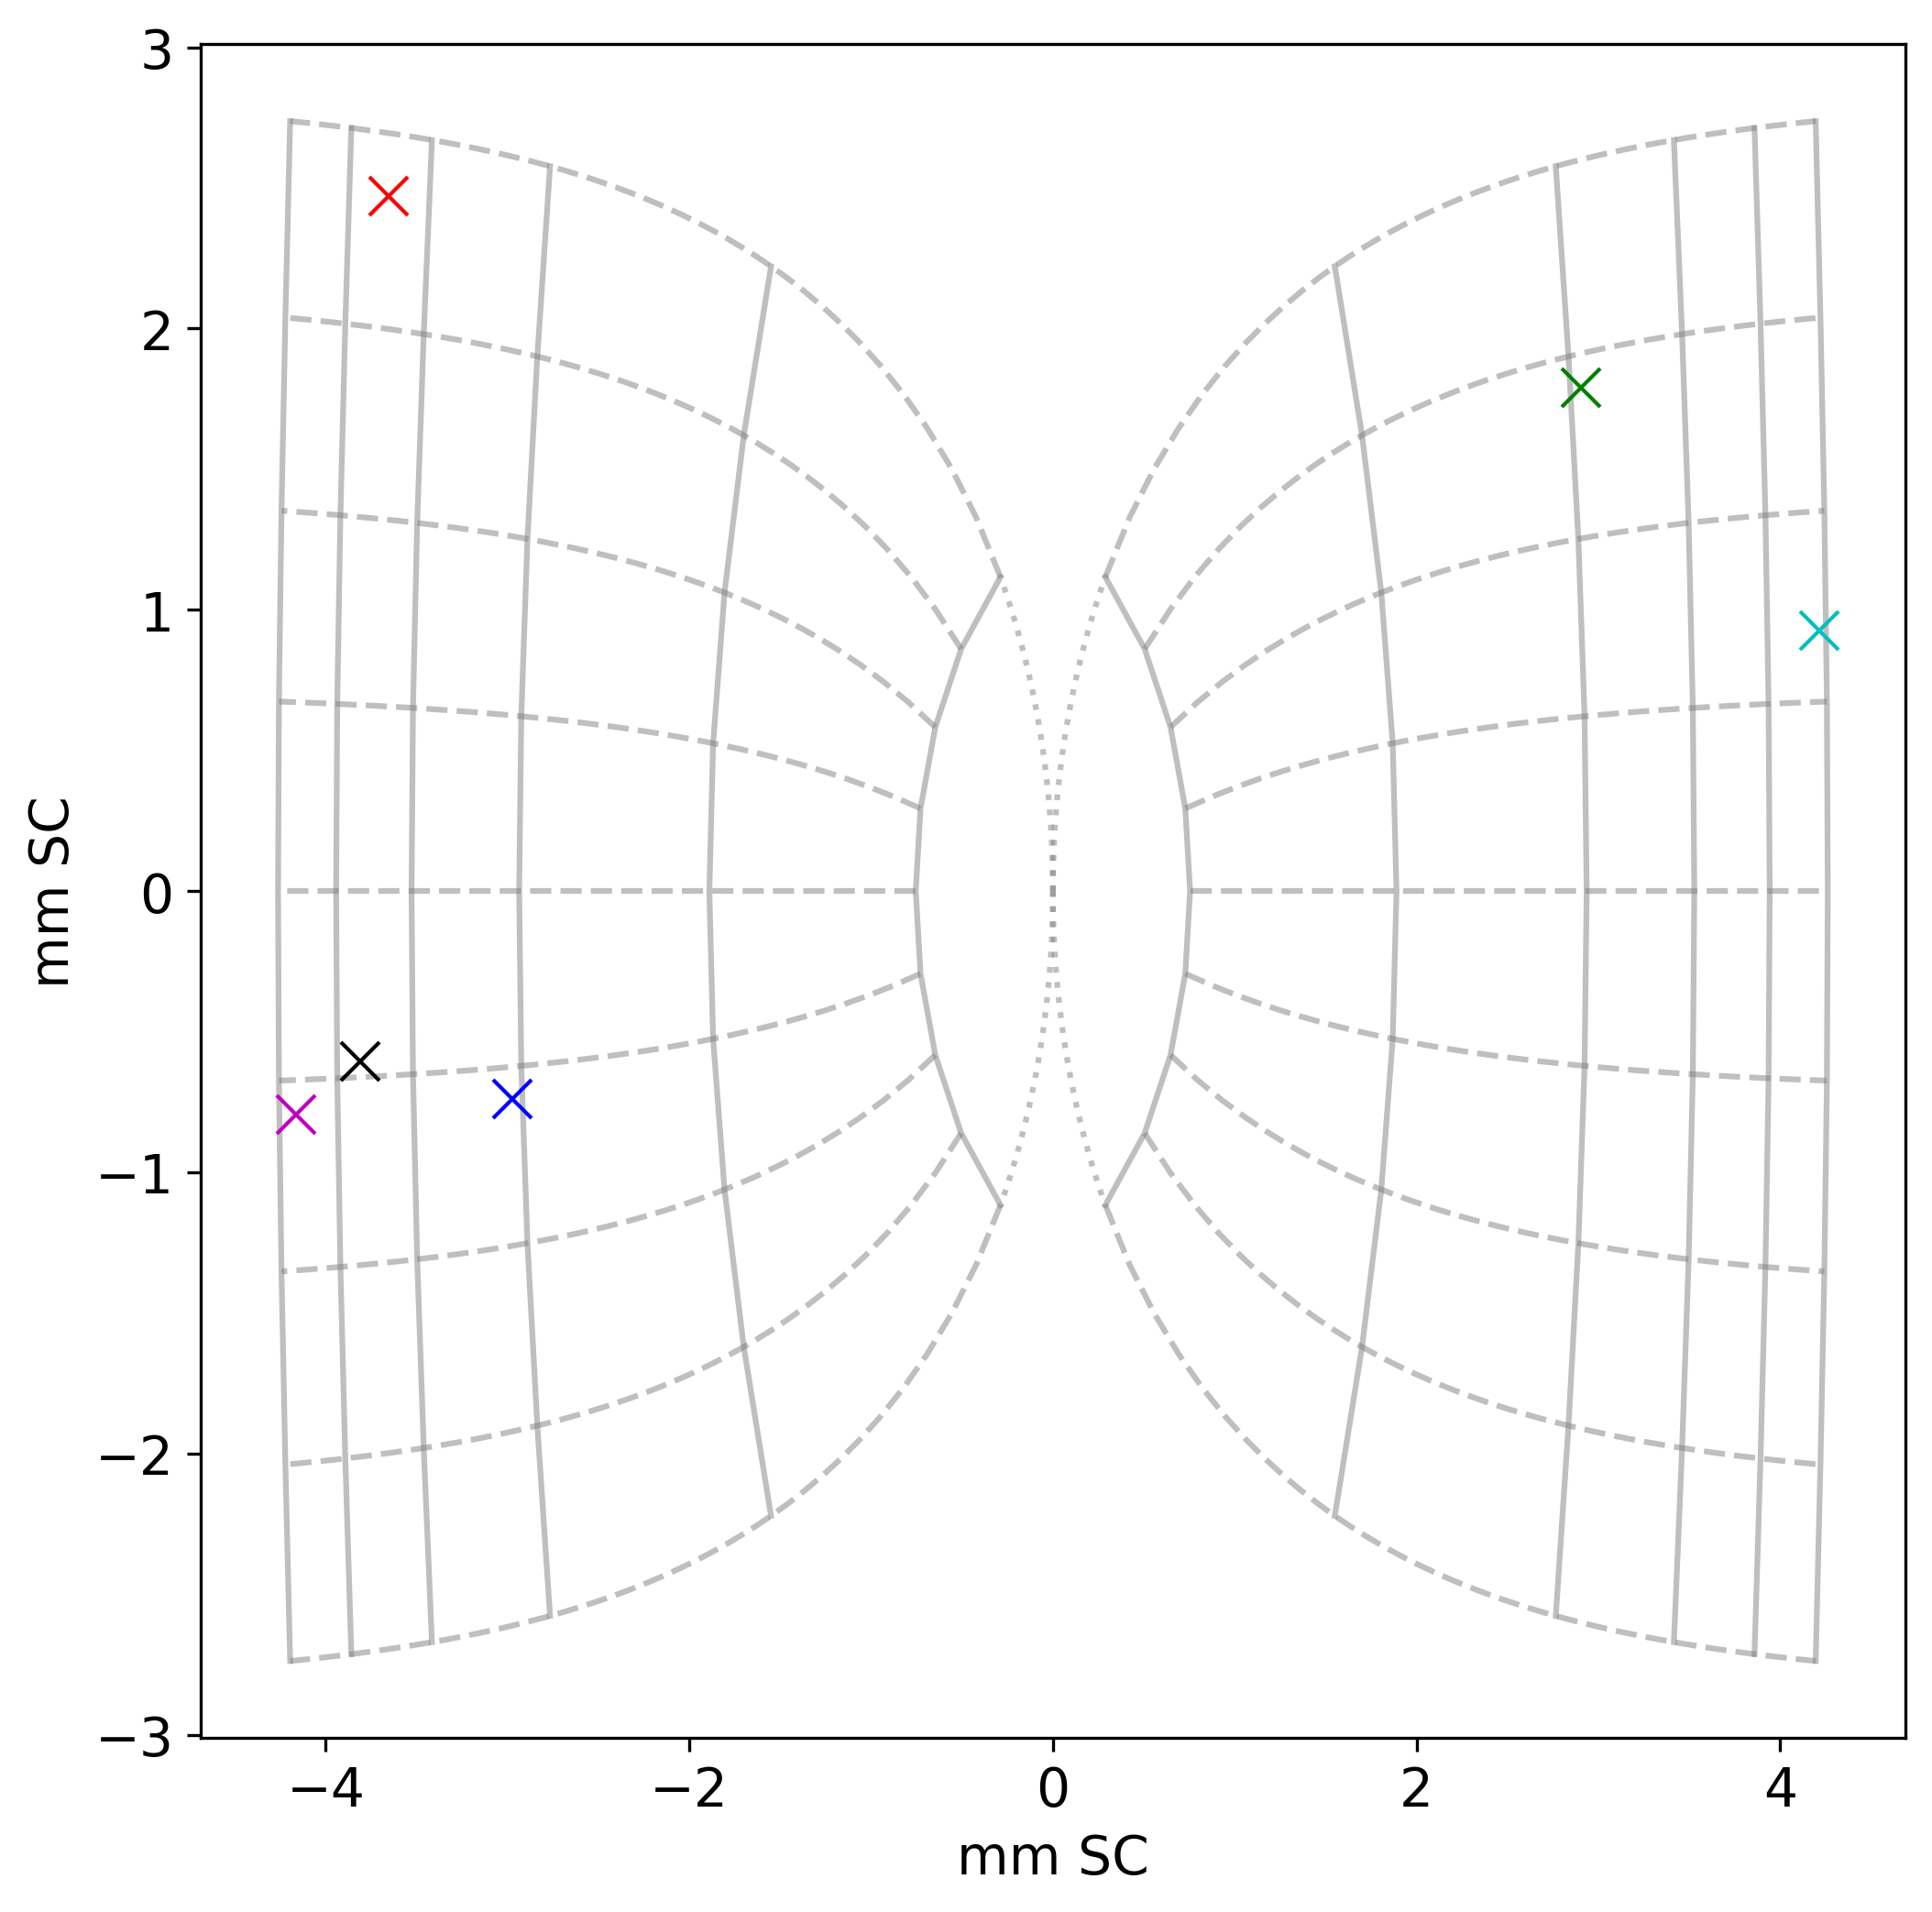

In [490]:
# final transform

import numpy as np
import matplotlib.pyplot as plt
# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

def x_transform(r, theta, Bx, A):
   return Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta) + A**2) / A)
def y_transform(r, theta, By, A):
   return By * np.arctan2(r * np.sin(theta), (r * np.cos(theta) + A))

# Constants for the transformation
A = 3 * np.pi/180
Bx = 1.4 
By = 1.8

# AP = np.pi/3
# R_dots = 5
# Theta_dots = 12
# T = 100
# F = 10

angles = np.linspace(-AP, AP, Theta_dots)
radii = np.linspace(AP/F, AP, R_dots)
step_size = (AP - AP/F) / (R_dots - 1)
new_value = radii[0] - 0.5 * step_size
radii = np.insert(radii, 0, new_value)

angles_full = np.linspace(-np.pi/2, np.pi/2, 9)
# angles_full = np.linspace(-AP, AP, T) #
radii_full = np.linspace(AP/F - step_size/2, AP, T)
radii_extra = np.linspace(0, AP/F - step_size/2, T)

# dot_A_rt=[5,np.radians(-20)]
# dot_C_rt=[5,np.radians(45)]
# dot_B_rt_=[5,np.radians(135 - 180)]
# dot_D_rt_=[5,np.radians(200 - 180)]

dot_A_transform = [x_transform(dot_A_rt[0],dot_A_rt[1],Bx,A),y_transform(dot_A_rt[0],dot_A_rt[1],By,A)]
print(dot_A_transform)
dot_B_transform = [x_transform(dot_B_rt[0],dot_B_rt[1],Bx,A),y_transform(dot_B_rt[0],dot_B_rt[1],By,A)]
print(dot_B_transform)
dot_C_transform = [x_transform(dot_C_rt[0],dot_C_rt[1],Bx,A),y_transform(dot_C_rt[0],dot_C_rt[1],By,A)]
print(dot_C_transform)
dot_D_transform = [x_transform(dot_D_rt[0],dot_D_rt[1],Bx,A),y_transform(dot_D_rt[0],dot_D_rt[1],By,A)]
print(dot_D_transform)
dot_E_transform = [x_transform(dot_E_rt[0],dot_E_rt[1],Bx,A),y_transform(dot_E_rt[0],dot_E_rt[1],By,A)]
print(dot_E_transform)
dot_F_transform = [x_transform(dot_F_rt[0],dot_F_rt[1],Bx,A),y_transform(dot_F_rt[0],dot_F_rt[1],By,A)]
print(dot_F_transform)

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot lines for each radius over all angles
for r in radii:
   X = x_transform(r, angles_full, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
   # print('r=',r,'theta=',angles_full[-1],'X=',X)
   Y = y_transform(r, angles_full, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
   plt.plot(X, Y, 'grey', alpha=0.5)
   plt.plot(-X, Y, 'grey', alpha=0.5)

# Plot lines for each angle over all radii
for angle in angles_full:
   X = x_transform(radii_full, angle, Bx, A) # Bx * np.log(np.sqrt(r_all**2 + 2 * A * r_all * np.cos(theta) + A**2) / A)
   Y = y_transform(radii_full, angle, By, A) # By * np.arctan2(r_all * np.sin(theta), (r_all * np.cos(theta) + A))
   print('angle=',angle)
   plt.plot(X, Y, 'grey', linestyle='dashed', alpha=0.5)
   plt.plot(-X, Y, 'grey', linestyle='dashed', alpha=0.5)
for angle in [angles_full[0],angles_full[-1]]:
   X = x_transform(radii_extra, angle, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
   Y = y_transform(radii_extra, angle, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
   plt.plot(X, Y, 'grey', linestyle='dotted', alpha=0.5)
   plt.plot(-X, Y, 'grey', linestyle='dotted', alpha=0.5)

plt.plot(-dot_A_transform[0],dot_A_transform[1],'rx', markersize=10)
plt.plot(-dot_B_transform[0],dot_B_transform[1],'bx', markersize=10)
plt.plot(-dot_C_transform[0],-dot_C_transform[1],'kx', markersize=10)
plt.plot(dot_D_transform[0],dot_D_transform[1],'gx', markersize=10)
plt.plot(-dot_E_transform[0],-dot_E_transform[1],'mx', markersize=10)
plt.plot(dot_F_transform[0],dot_F_transform[1],'cx', markersize=10)


# Labeling and title
# plt.title('SC Transform (angle->x/y)')
plt.xlabel('mm SC', fontsize=14)
plt.ylabel('mm SC', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

dot_A_transform = [1.353087510444614, -0.3934550707229767]
dot_B_transform = [1.2697842780130701, -0.8925924435368852]


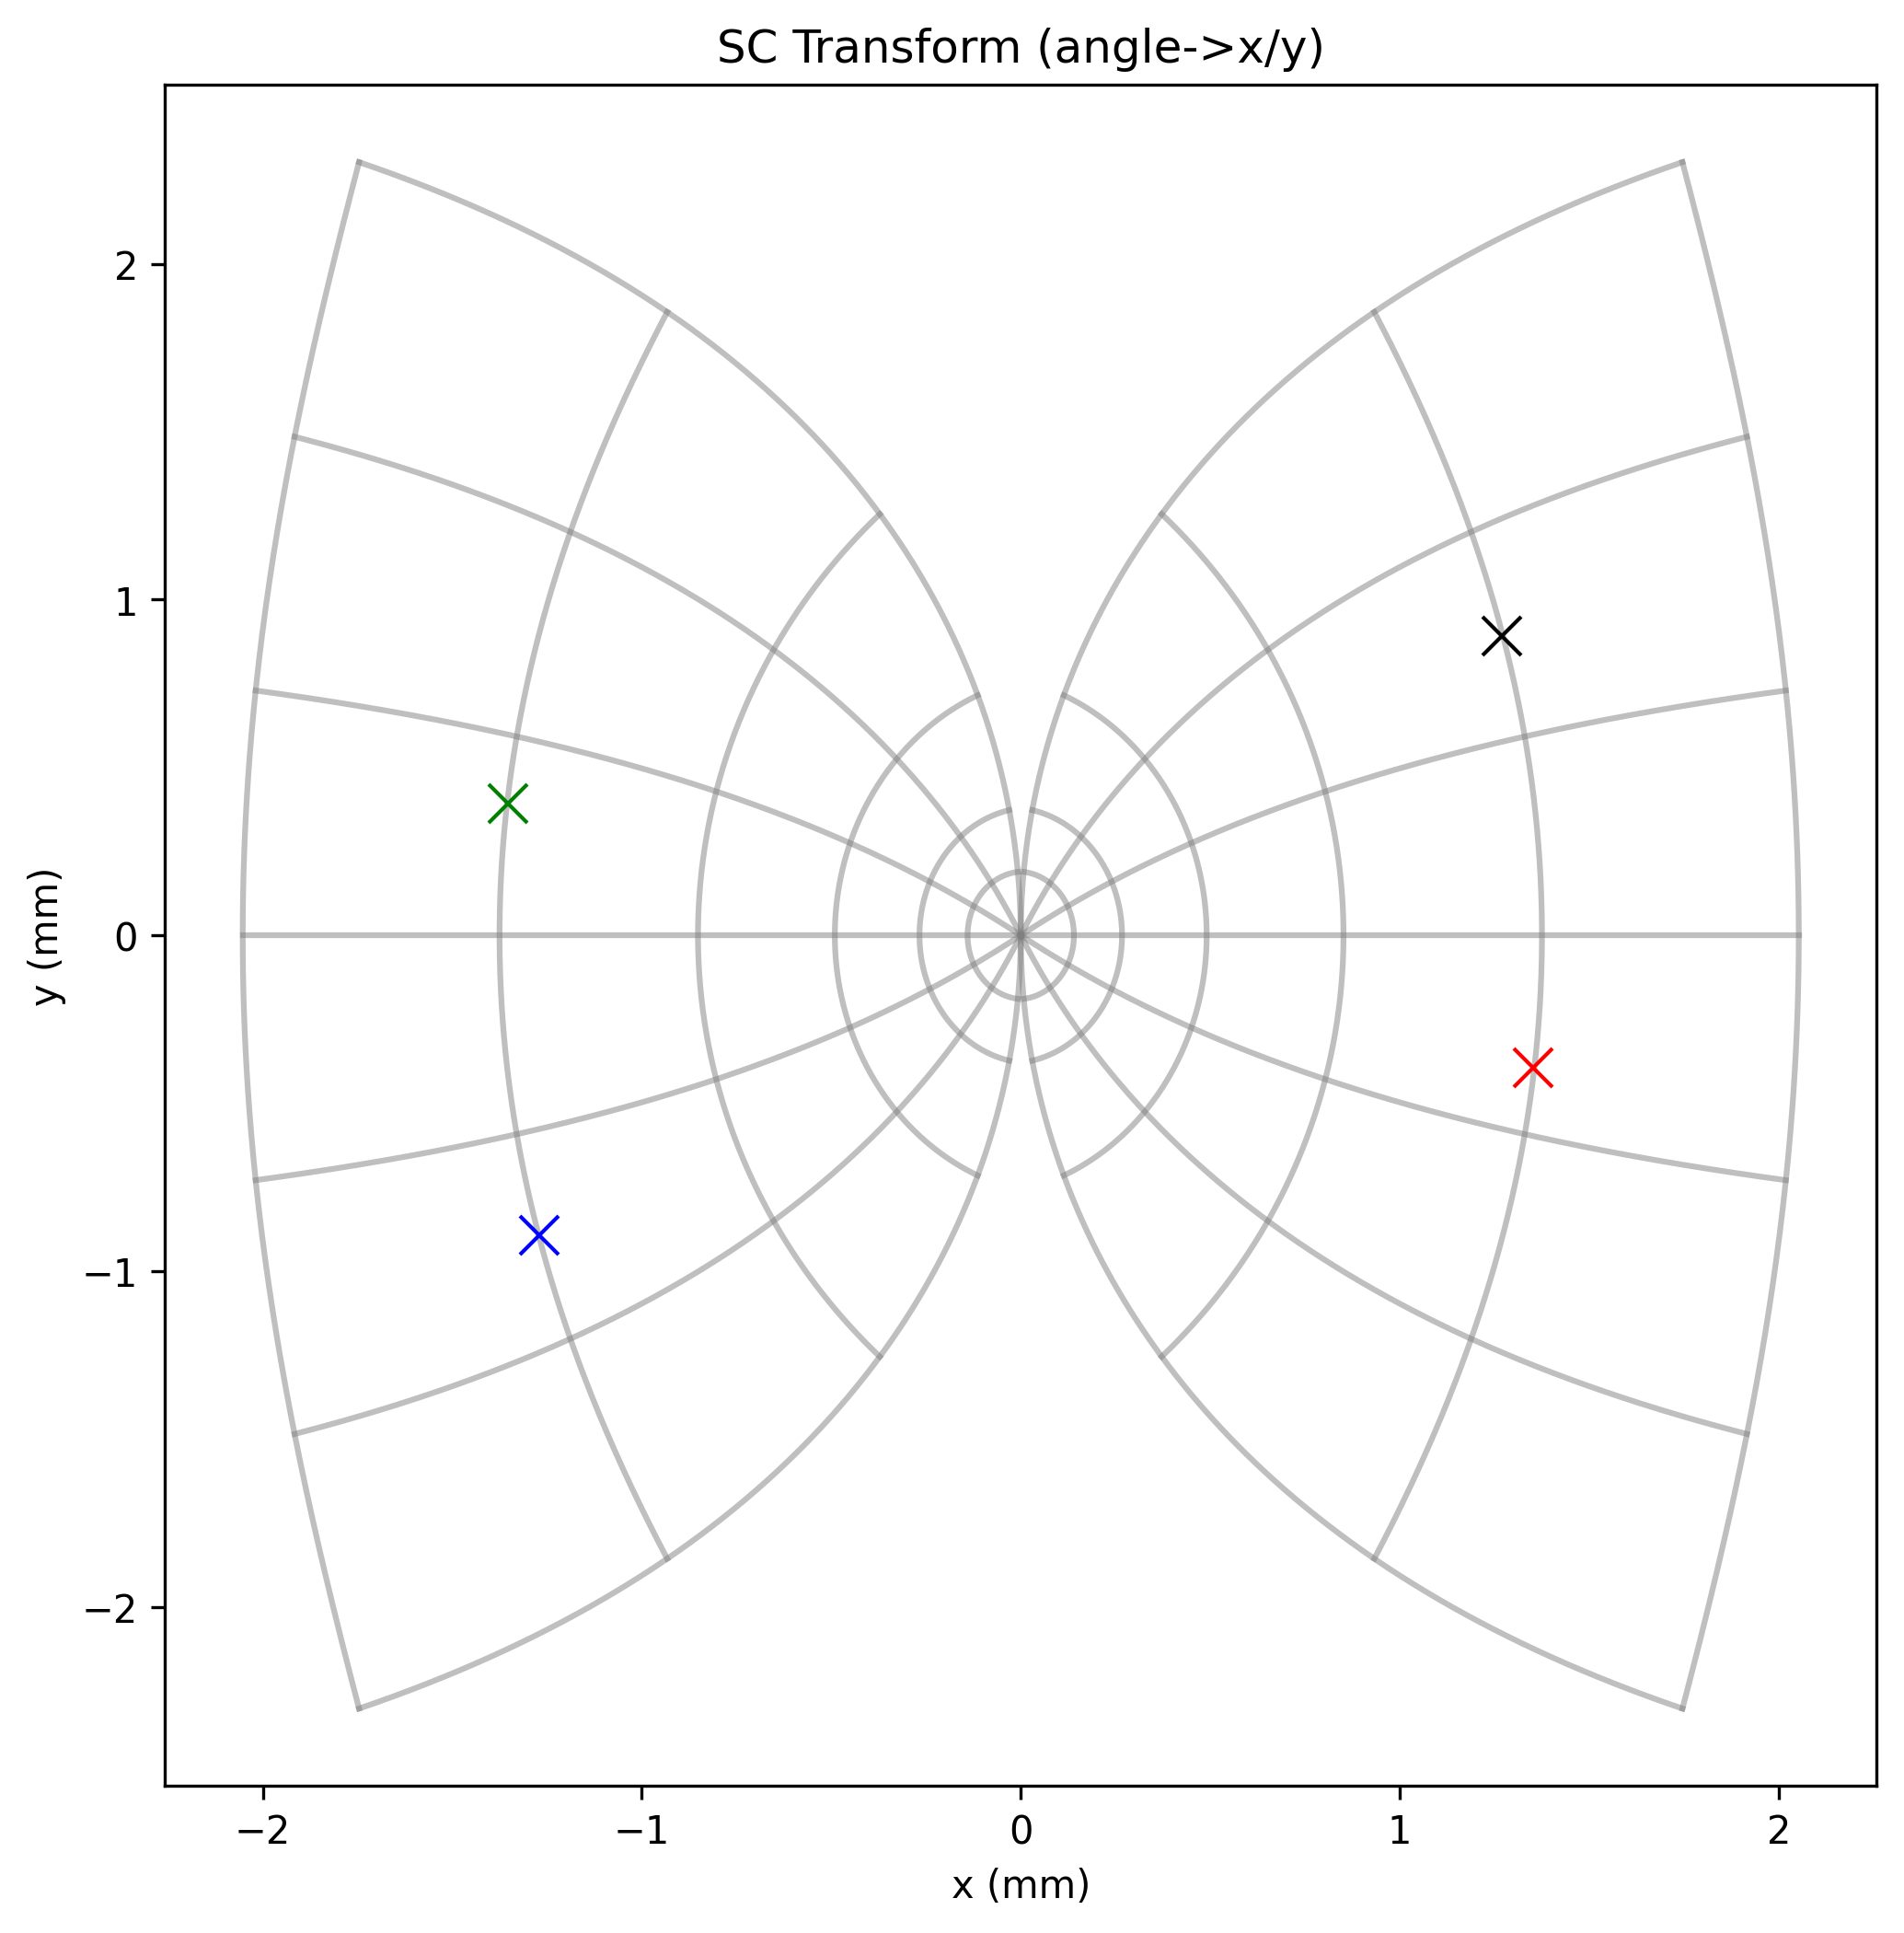

In [311]:
# final old

import numpy as np
import matplotlib.pyplot as plt

# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

def x_transform(r, theta, Bx, A):
    return Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta) + A**2) / A)

def y_transform(r, theta, By, A):
    return By * np.arctan2(r * np.sin(theta), (r * np.cos(theta) + A))

# Constants for the transformation
A = 3
Bx = 1.4
By = 1.8

AP = np.pi/3
R_dots = 6
Theta_dots = 12

# dots
dot_A_rt=[5,np.radians(-20)]
dot_C_rt=[5,np.radians(45)]
dot_B_rt_=[5,np.radians(135 - 180)]
dot_D_rt_=[5,np.radians(200 - 180)]


dot_A_transform = [x_transform(dot_A_rt[0],dot_A_rt[1],Bx,A),y_transform(dot_A_rt[0],dot_A_rt[1],By,A)]
dot_C_transform = [x_transform(dot_C_rt[0],dot_C_rt[1],Bx,A),y_transform(dot_C_rt[0],dot_C_rt[1],By,A)]
dot_B_transform = [x_transform(dot_B_rt_[0],dot_B_rt_[1],Bx,A),y_transform(dot_B_rt_[0],dot_B_rt_[1],By,A)]
dot_D_transform = [x_transform(dot_D_rt_[0],dot_D_rt_[1],Bx,A),y_transform(dot_D_rt_[0],dot_D_rt_[1],By,A)]

# Define discrete radii and angles
R = np.logspace(-0.5, 1, R_dots) # np.logspace(-1,1,8)

# R = np.array([0, 0.3, 1, 2.5, 5, 10, 20]) # np.logspace(-1,1,8)
# Theta =  np.radians([-90, -60, -30, 0, 30, 60, 90]) # np.radians([90,120,150,180,210,240,270])

# Define fine linspace for all radii and angles
r_all = np.linspace(0, 10, 300)
theta_all = np.linspace(-np.pi/2, np.pi/2, 300)

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot lines for each radius over all angles
for r in R:
    X = x_transform(r, theta_all, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
    Y = y_transform(r, theta_all, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
    plt.plot(X, Y, 'grey', alpha=0.5)
    plt.plot(-X, Y, 'grey', alpha=0.5)

# Plot lines for each angle over all radii
for theta in Theta:
    X = x_transform(r_all, theta, Bx, A) # Bx * np.log(np.sqrt(r_all**2 + 2 * A * r_all * np.cos(theta) + A**2) / A)
    Y = y_transform(r_all, theta, By, A) # By * np.arctan2(r_all * np.sin(theta), (r_all * np.cos(theta) + A))
    plt.plot(X, Y, 'grey', alpha=0.5)
    plt.plot(-X, Y, 'grey', alpha=0.5)

print('dot_A_transform =', dot_A_transform)
print('dot_B_transform =', dot_B_transform)

plt.plot(dot_A_transform[0],dot_A_transform[1],'rx', markersize=10)
plt.plot(dot_C_transform[0],dot_C_transform[1],'kx', markersize=10)
plt.plot(-dot_B_transform[0],dot_B_transform[1],'bx', markersize=10)
plt.plot(-dot_D_transform[0],dot_D_transform[1],'gx', markersize=10)

# Labeling and title
plt.title('SC Transform (angle->x/y)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# Show the plot
plt.show()


In [ ]:
# misc

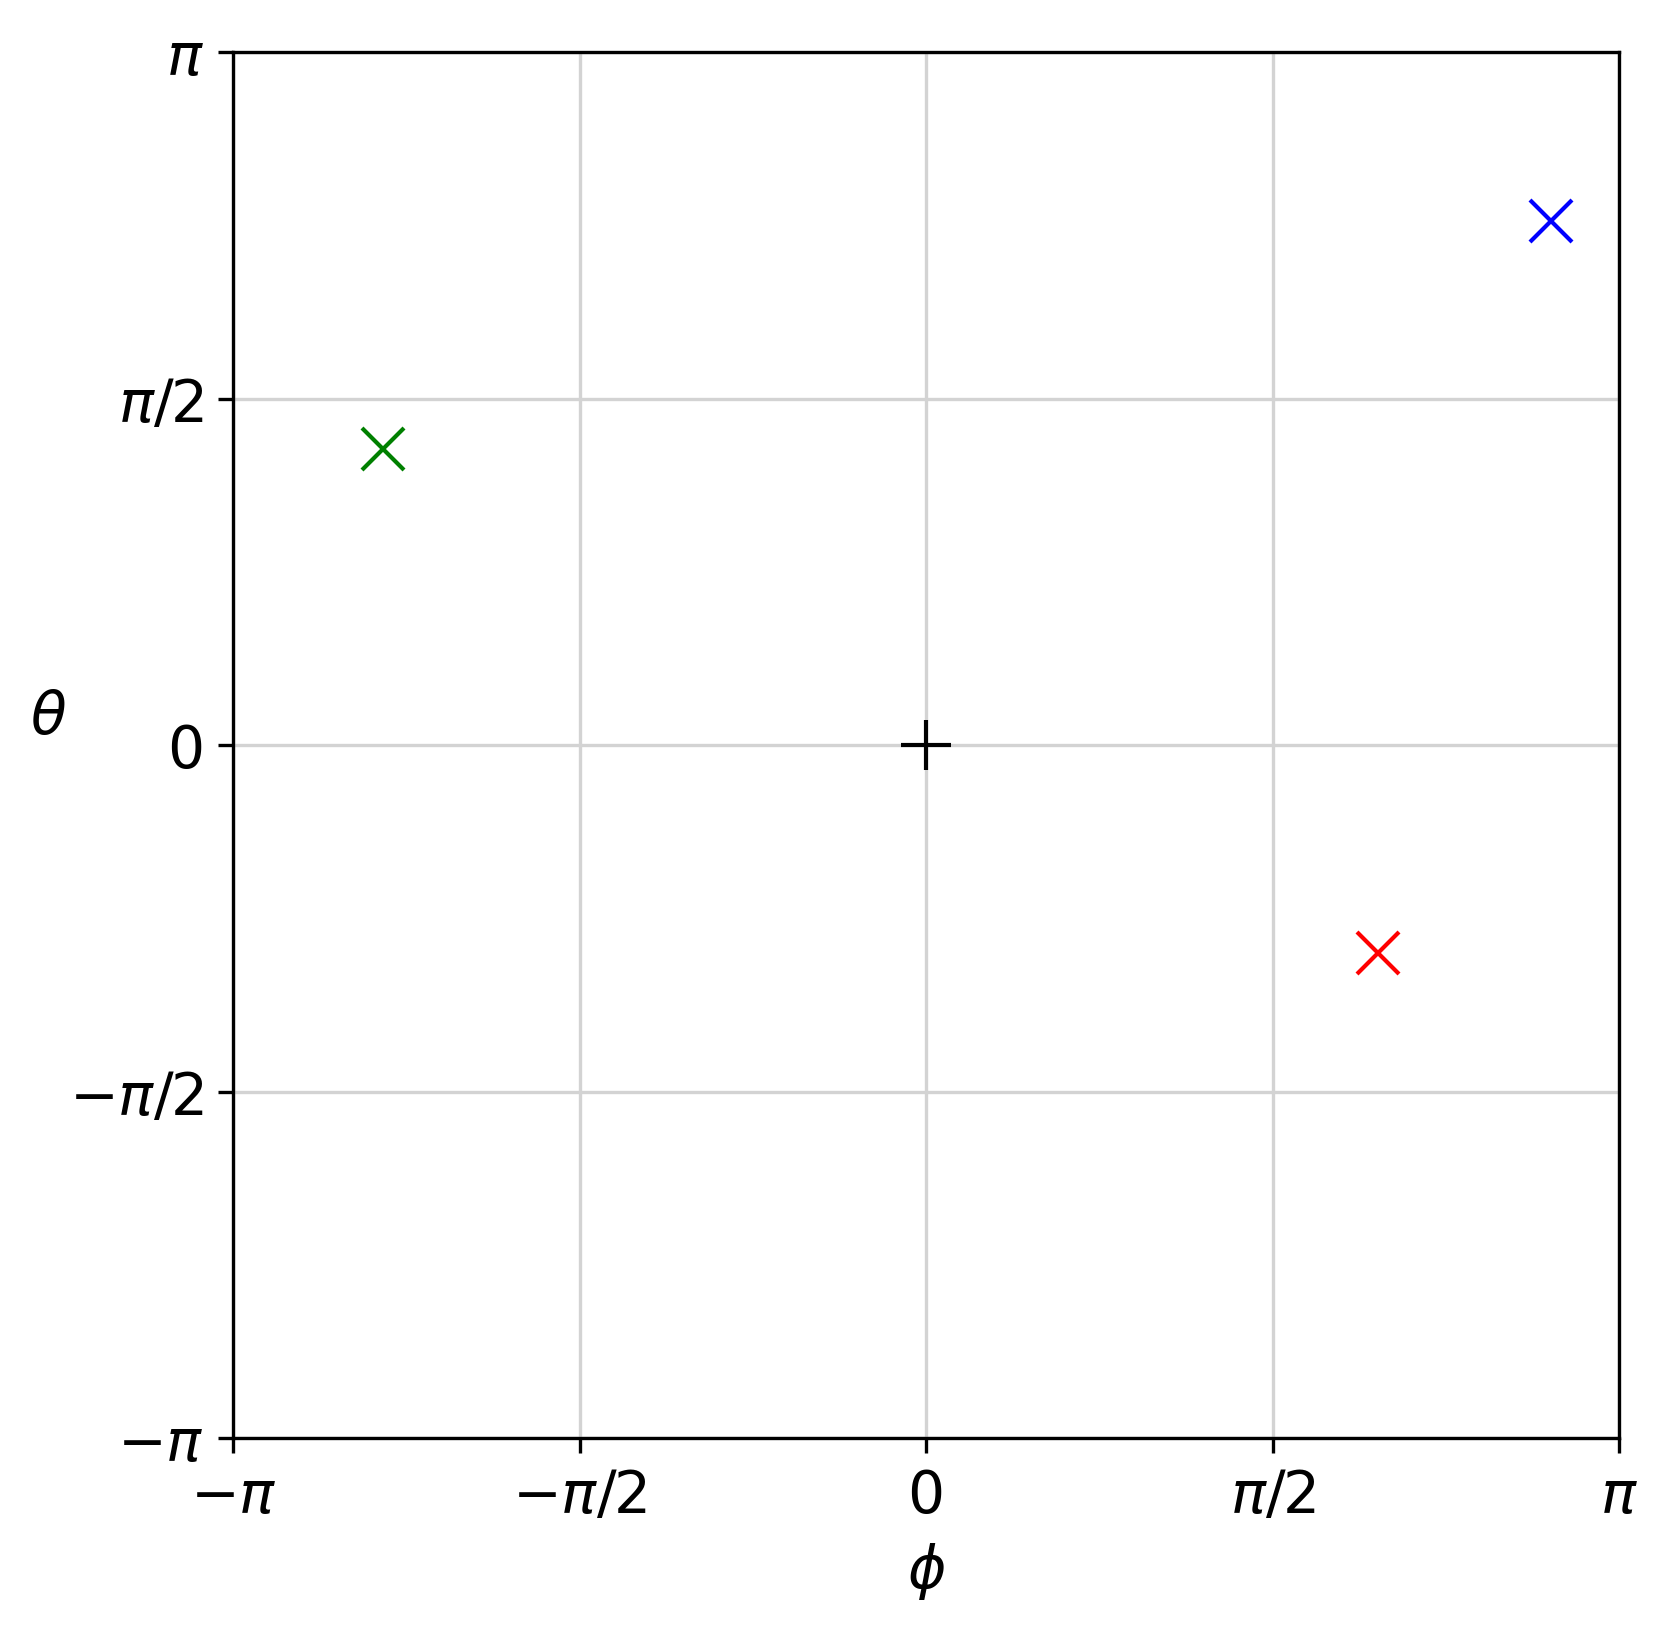

In [523]:
# Recreate the plot with specified changes

# Define the figure and axis with square figure (equal aspect ratio)
fig, ax = plt.subplots(figsize=(6,6))

# Set the x and y range from -pi to pi
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-np.pi, np.pi])

# Set the ticks at the specified positions
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = ['$-\\pi$', '$-\\pi/2$', '0', '$\\pi/2$', '$\\pi$']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=14)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels, fontsize=14)

# Add colored crosses at random positions
# Red cross
ax.plot(np.random.uniform(-np.pi, np.pi), np.random.uniform(-np.pi, np.pi), 'rx', markersize=10)
# Green cross
ax.plot(np.random.uniform(-np.pi, np.pi), np.random.uniform(-np.pi, np.pi), 'gx', markersize=10)
# Blue cross
ax.plot(np.random.uniform(-np.pi, np.pi), np.random.uniform(-np.pi, np.pi), 'bx', markersize=10)

# Add a black plus at (0,0)
ax.plot(0, 0, 'k+', markersize=12)

# Label the axes
ax.set_xlabel('$\\phi$', fontsize=14)
ax.set_ylabel('$\\theta$', rotation=0, labelpad=5, fontsize=14)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Remove the grid
ax.grid(True, linestyle='-', color='lightgrey')

# Show the plot
plt.show()


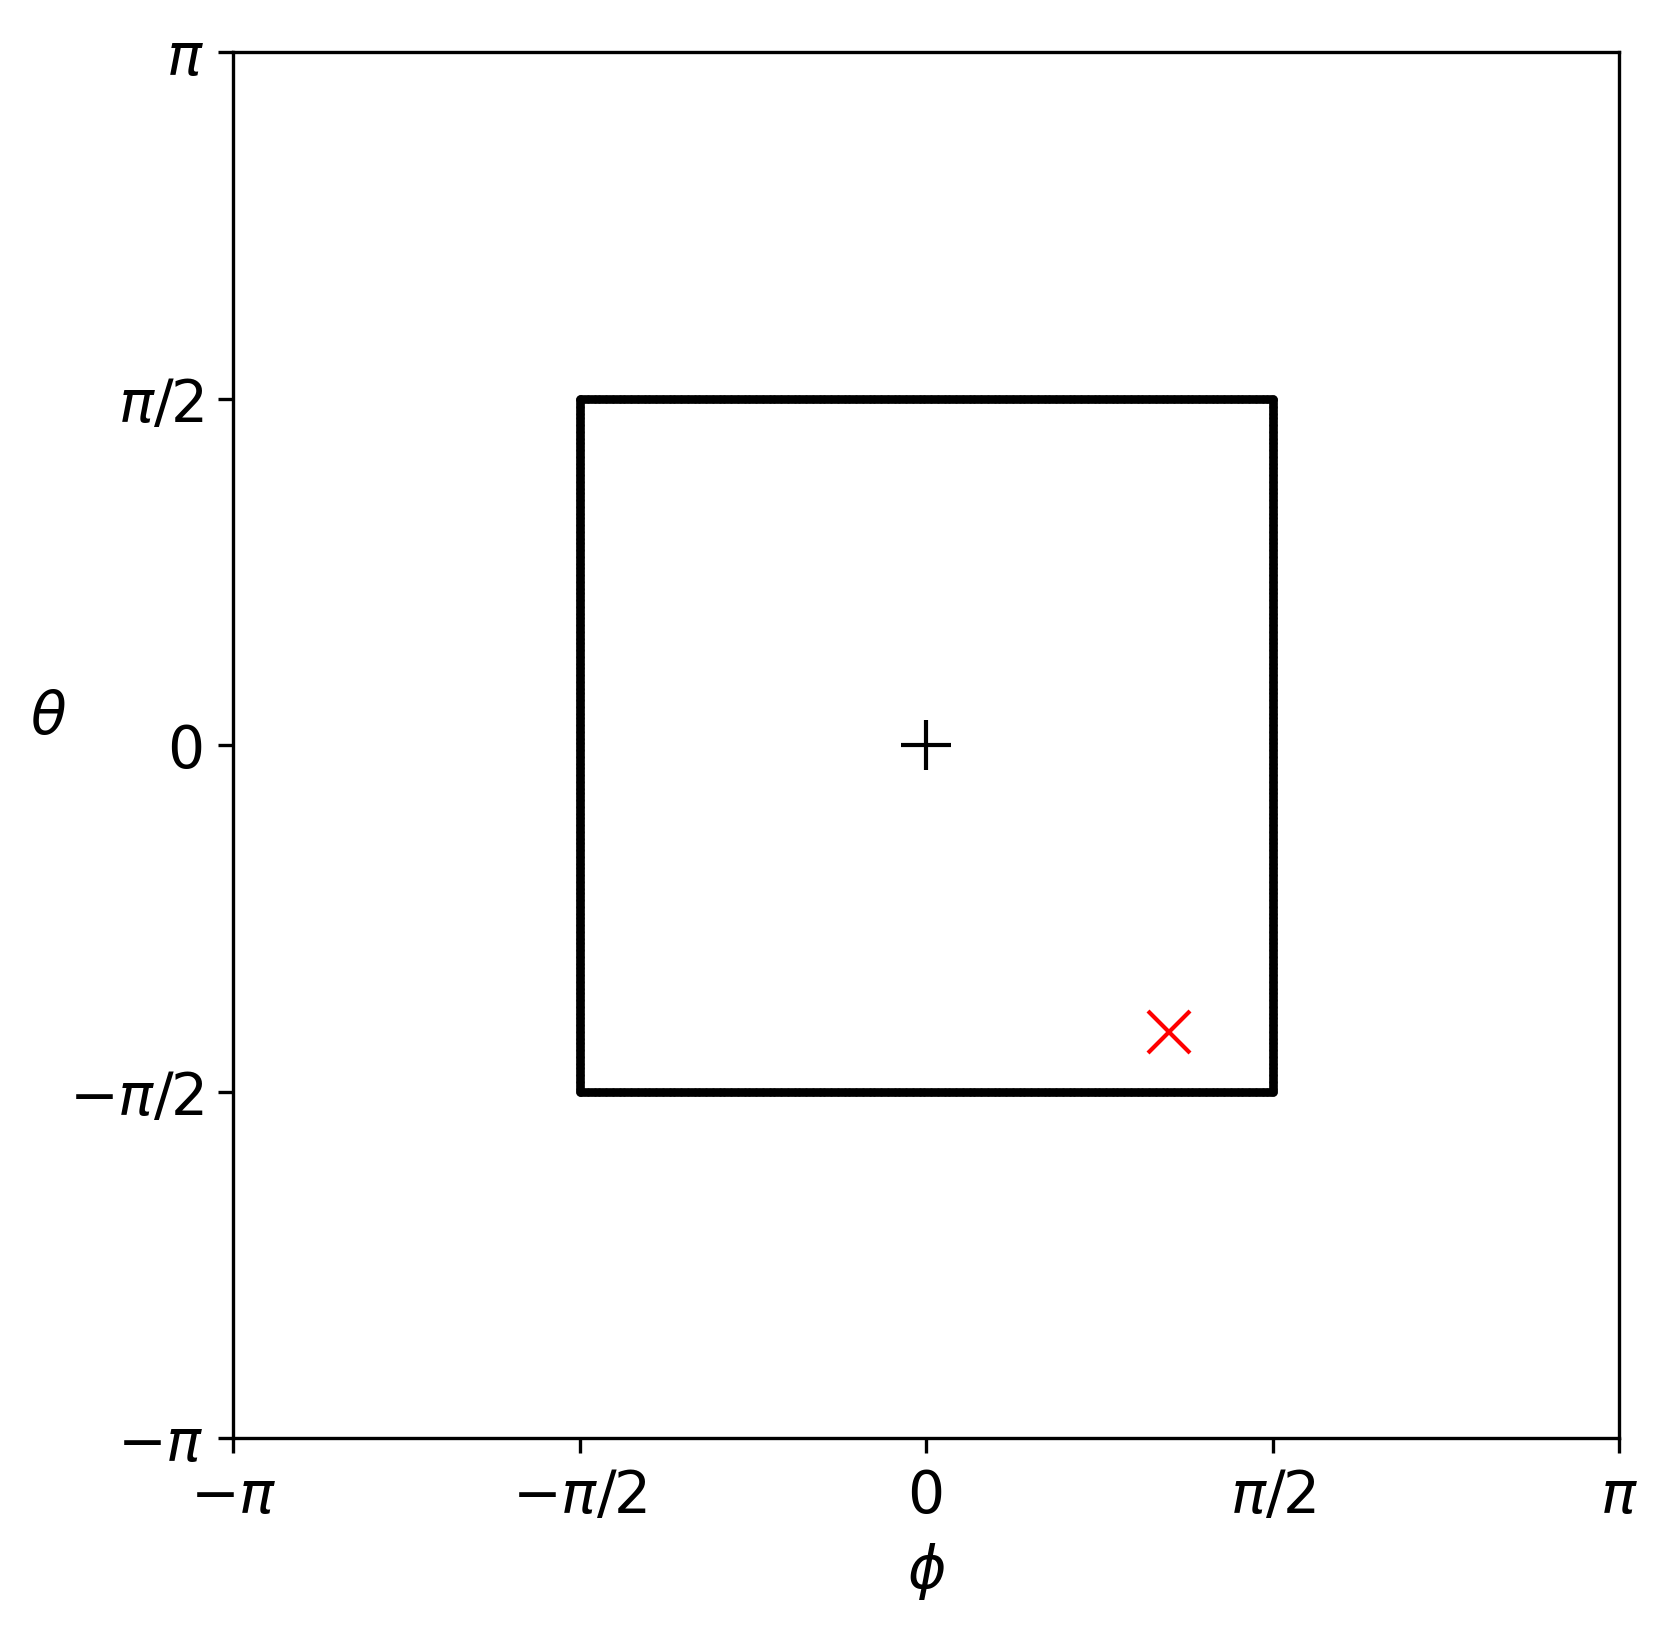

In [622]:
# Recreate the plot with specified changes

def get_aperture_points(agent_t,aperture,density=500):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot, y_tot

MODULES = 9
PLAN_SPACE = np.pi/2

# def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
index_range = np.arange(MODULES**2)
x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
A_full = np.vstack([xv.flatten(),yv.flatten()])

    # inner_mask = (np.abs(xv) <= ACTION_SPACE) & (np.abs(yv) <= ACTION_SPACE)
    # A_inner_ind = index_range[inner_mask.flatten()]
    # A_outer_ind = index_range[~inner_mask.flatten()]
    # A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    # A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    # ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    # VEC_ARR = A_full[:,ID_ARR]
    # H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    # SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    # return SC #,prior_vec,zero_vec_index

# Define the figure and axis with square figure (equal aspect ratio)
fig, ax = plt.subplots(figsize=(6,6))

# Set the x and y range from -pi to pi
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-np.pi, np.pi])

# Set the ticks at the specified positions
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = ['$-\\pi$', '$-\\pi/2$', '0', '$\\pi/2$', '$\\pi$']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=14)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=14)

# Add colored crosses at random positions
# Red cross
# ax.plot(np.random.uniform(-np.pi, np.pi), np.random.uniform(-np.pi, np.pi), 'rx', markersize=10)
ax.plot(1.1, -1.3, 'rx', markersize=10)

# Add a black plus at (0,0)
ax.plot(0, 0, 'k+', markersize=12)

# plot aperture:
agent_t = [0,0]
APERTURE = np.pi/2
x_tot, y_tot = get_aperture_points(agent_t,APERTURE)
ax.scatter(x_tot, y_tot, s=1, color='k')
# ax.scatter(A_full[0,:], A_full[1,:], s=4, color='k')

# Label the axes
ax.set_xlabel('$\\phi$', fontsize=14)
ax.set_ylabel('$\\theta$', rotation=0, labelpad=5, fontsize=14)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Remove the grid
# ax.grid(True, linestyle='-', color='lightgrey')

# Show the plot
plt.show()


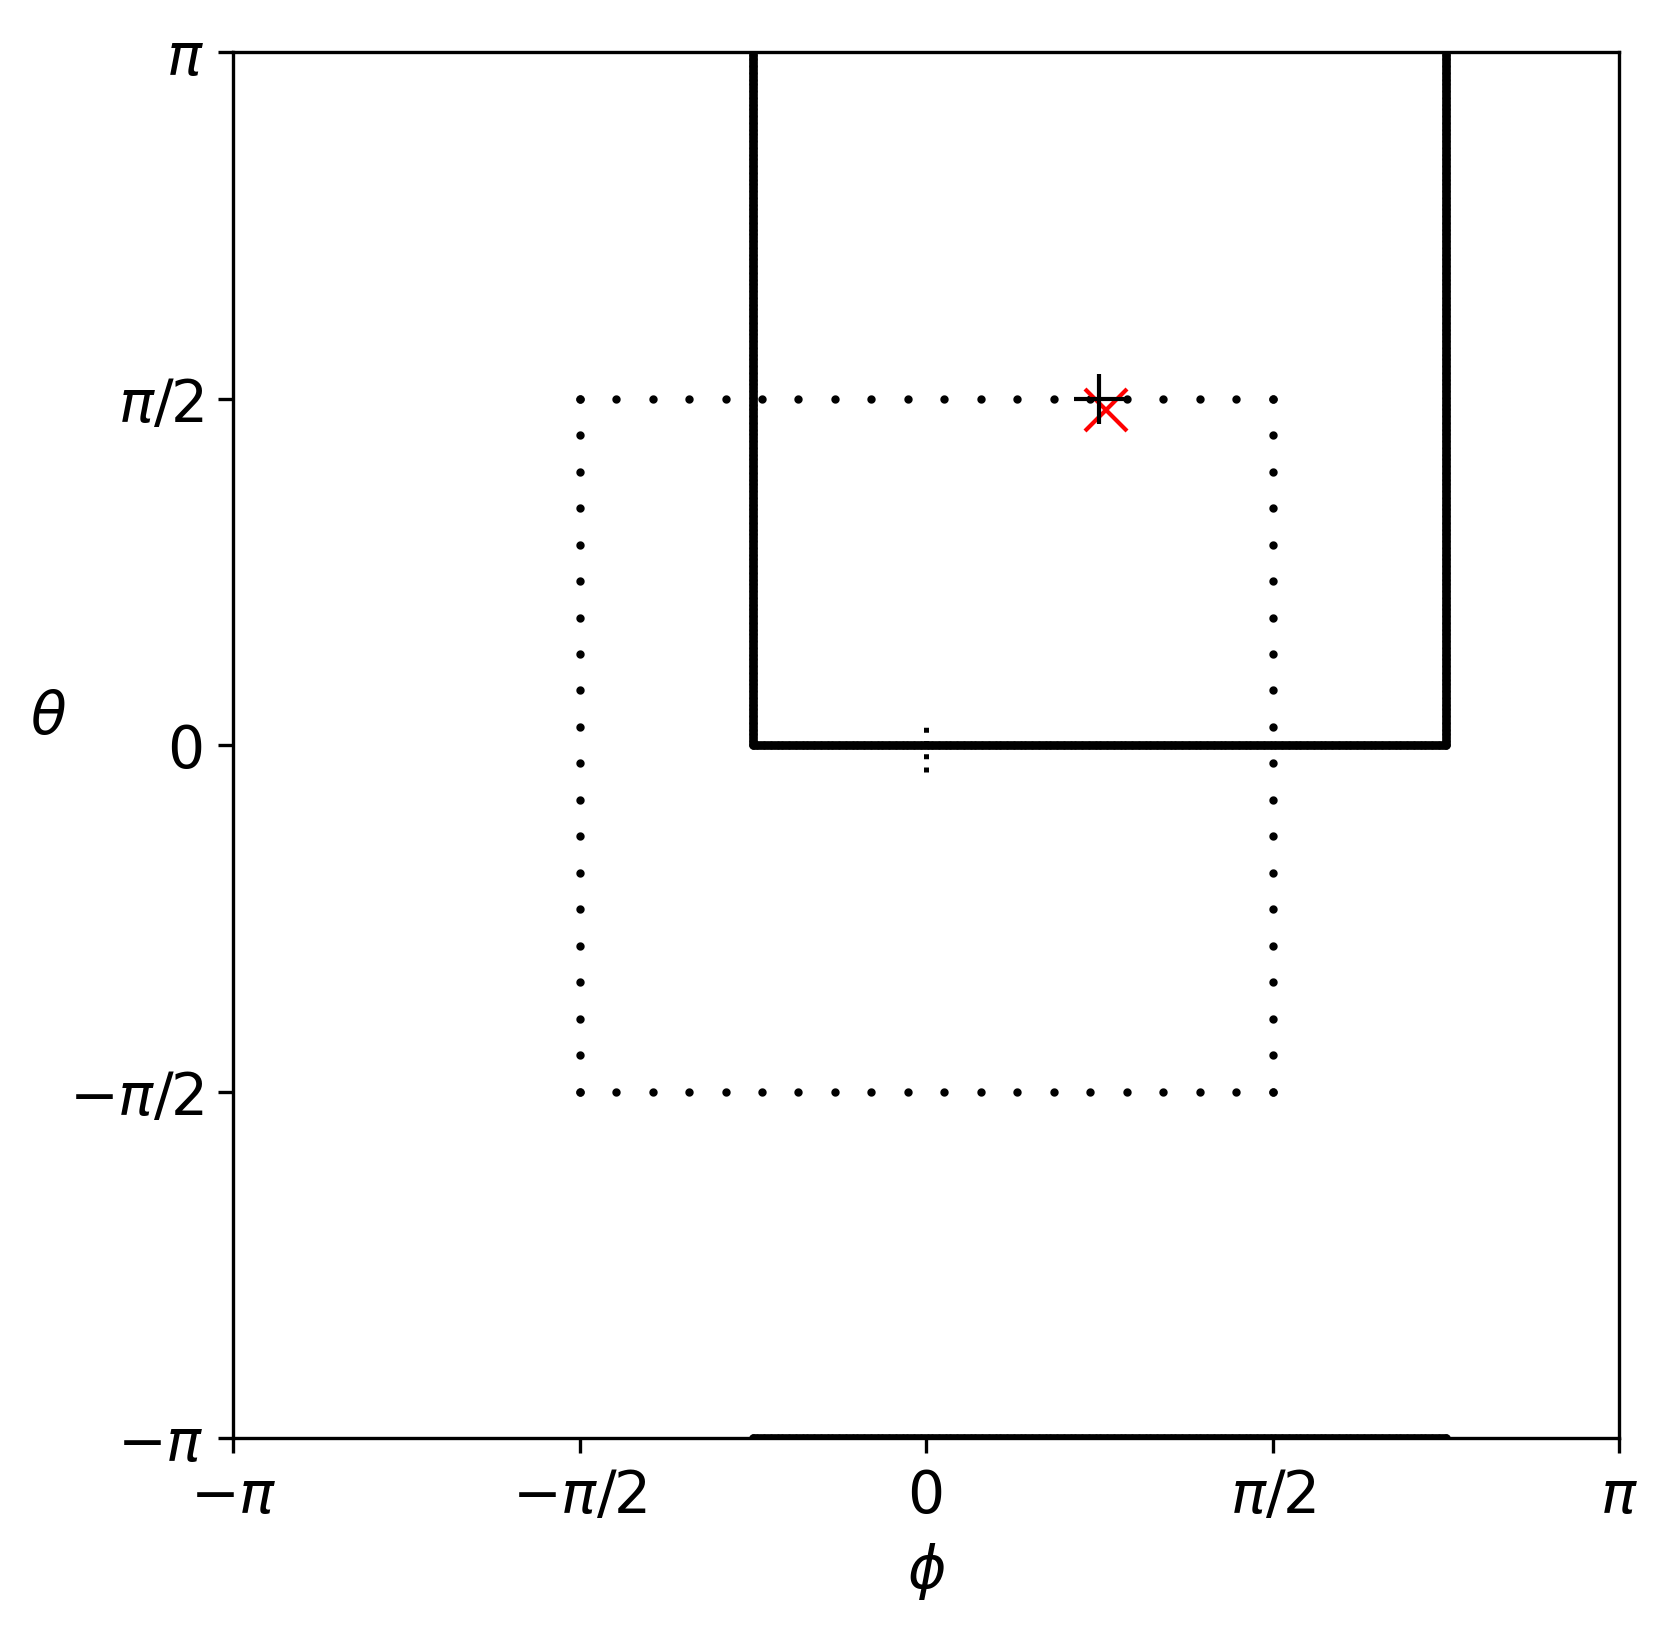

In [963]:
# prediction timeseries / ellipse plot
from matplotlib.patches import Ellipse

# Recreate the plot with specified changes

def get_aperture_points(agent_t,aperture,density=500):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot, y_tot

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

MODULES = 9
PLAN_SPACE = np.pi/2
i = np.pi/8

# def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
index_range = np.arange(MODULES**2)
x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
A_full = np.vstack([xv.flatten(),yv.flatten()])

fig, ax = plt.subplots(figsize=(6,6))

# v = [0.15, 0.15] * 5
v = np.array([-1.19, 0.24]) # .22

# x_t = [-1.2, -1.5]
# x_t = [0.3,0]

# x_1 = [-0.8,1.5]
# x_2 = [.5, -1.5]
# x_2 = [.85, -1.3]
# x_15 = [x_1[0]+ 0.8*(x_2[0]-x_1[0]), x_1[1]+ 0.8*(x_2[1]-x_1[1])]

x_0 = [-1.9, 0.8]
x_05 = x_0 + 1*v
x_1 = x_0 + 2*v
x_2 = x_0 + 3*v

# x = -3.8, -1.6 = .7,-1.6
# ax.plot(mod_(x_0[0]), mod_(x_0[1]), 'rx', markersize=10)
# ax.plot(mod_(x_05[0]), mod_(x_05[1]), 'rx', markersize=10)
# ax.plot(mod_(x_1[0]), mod_(x_1[1]), 'rx', markersize=10)
ax.plot(mod_(x_2[0]), mod_(x_2[1]), 'rx', markersize=10)

# p_t = [0.5,-1.2]
# p_t = [0, 0]
p_t = [2*i, -3*i]
# p_t = [2*i, 4*i]
ax.plot(p_t[0], p_t[1], 'k+', markersize=12)

# true aperture:
APERTURE = np.pi/2
x_tot, y_tot = get_aperture_points(p_t,APERTURE,density=500)
ax.scatter(mod_(x_tot), mod_(y_tot), s=1, color='k')

ap=.12
ax.plot([0, 0], [-ap, ap], 'k:', linewidth=1.2)  # Vertical dotted line
ax.plot([-ap, ap], [0, 0], 'k:', linewidth=1.2)  
x_0, y_0 = get_aperture_points([0,0],APERTURE,density=20)
ax.scatter(mod_(x_0), mod_(y_0), s=1, color='k')

# # # pred aperture
# pt_t = [p_t[0]+5*i,p_t[1]+3*i]
# ax.plot(pt_t[0], pt_t[1], 'lightgrey',marker='+', markersize=12)

# x_tot_pred, y_tot_pred = get_aperture_points(pt_t,APERTURE)
# ax.scatter(mod_(x_tot_pred), mod_(y_tot_pred), s=1, color='lightgrey')

# policy
# ax.scatter(A_full[0,:], A_full[1,:], s=4, color='k')

# prediction
w = 1.2# 2
h = 1.4# 1.8
# ell_circular = Ellipse(xy=(x_t[0], x_t[1]), width=w, height=h, edgecolor='blue', facecolor='none')
# ax.add_patch(ell_circular)

ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-np.pi, np.pi])
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = ['$-\\pi$', '$-\\pi/2$', '0', '$\\pi/2$', '$\\pi$']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=14)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=14)

ax.set_xlabel('$\\phi$', fontsize=14)
ax.set_ylabel('$\\theta$', rotation=0, labelpad=5, fontsize=14)
ax.set_aspect('equal')
# ax.grid(True, linestyle='-', color='lightgrey')
plt.show()



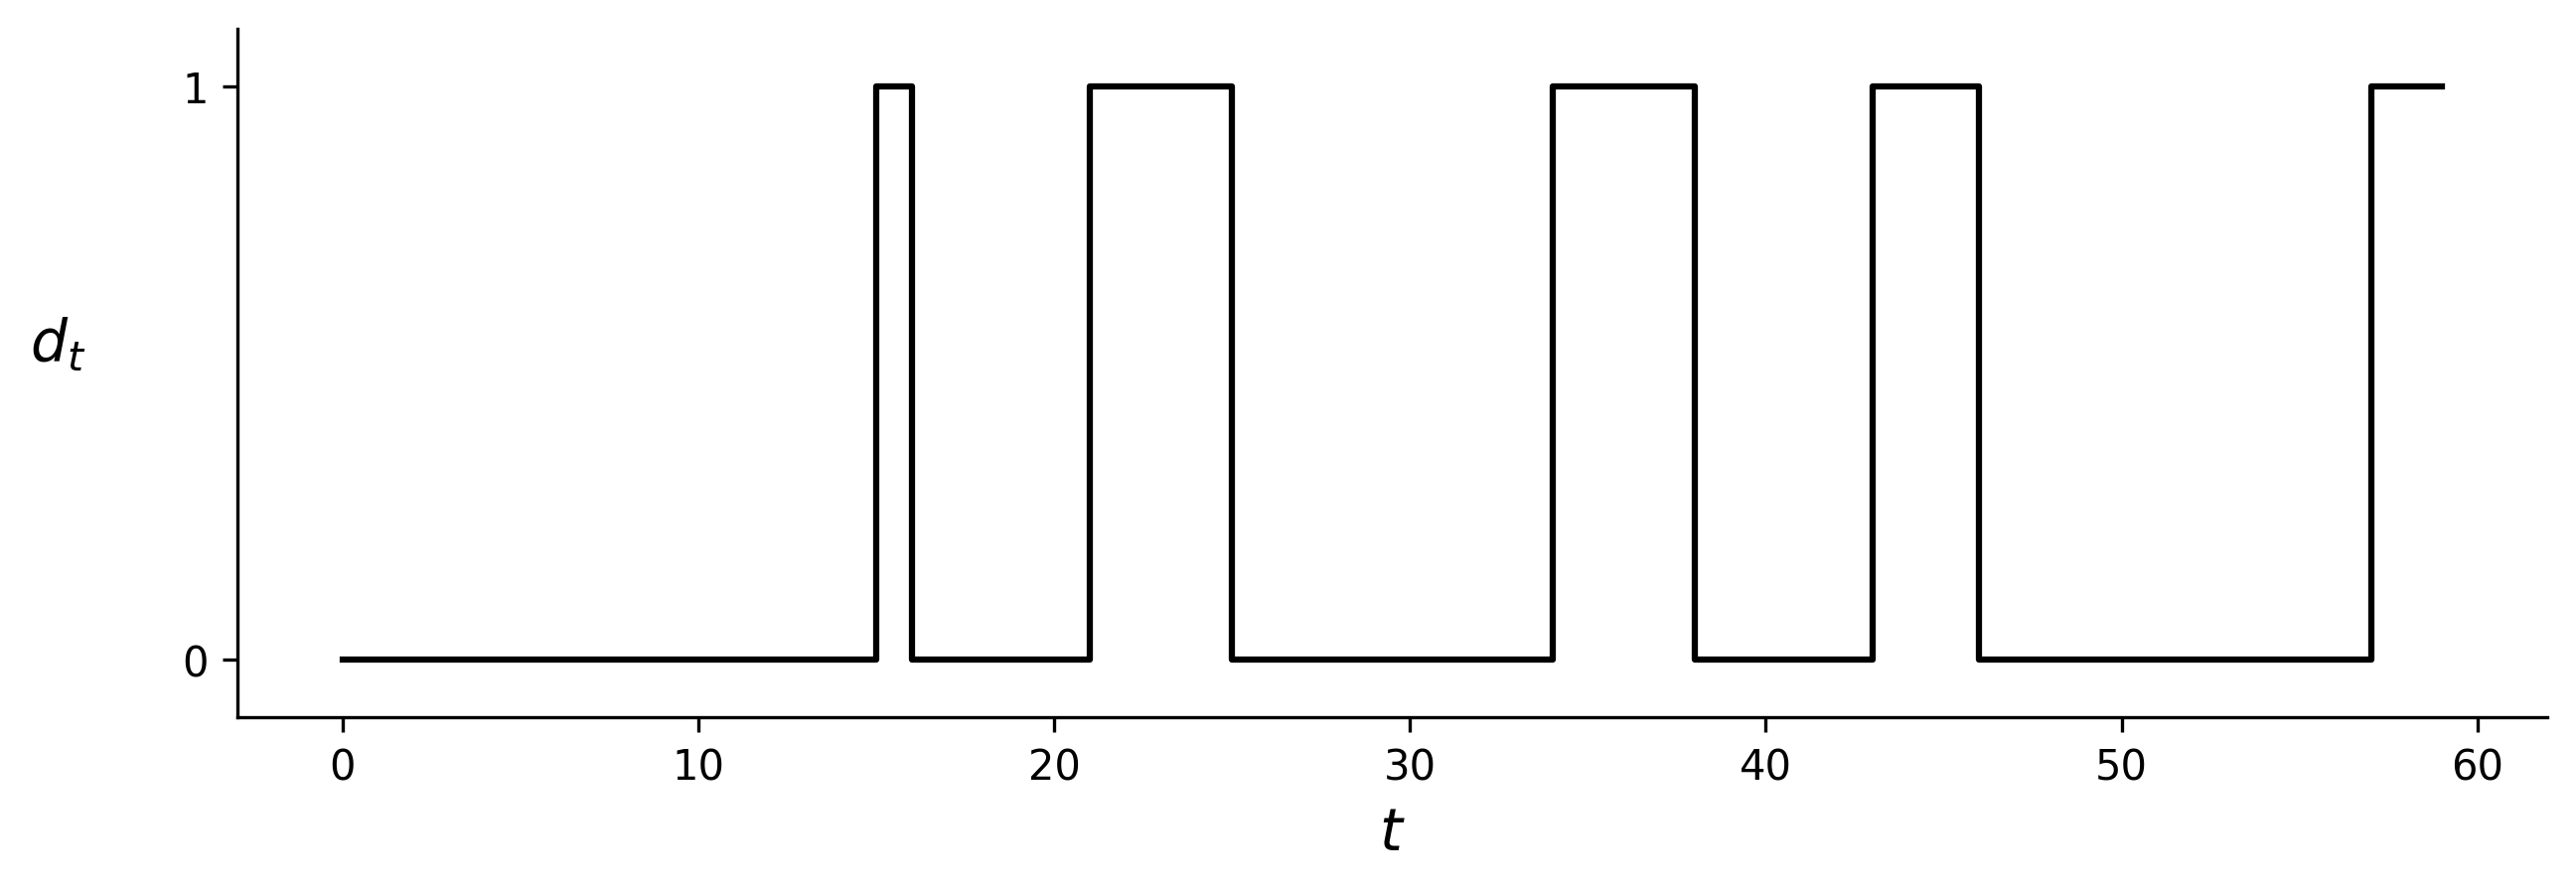

In [602]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
timesteps = 60
alpha = 0.1  # Chance of switching
k = 5        # Maximum number of consecutive 1s

# Initialize the time series
time_series = np.zeros(timesteps)
current_state = 0
consecutive_ones = 0  # Counter for consecutive ones

# Generate the time series
for t in range(1, timesteps):
    if current_state == 1:
        consecutive_ones += 1
    else:
        consecutive_ones = 0

    if np.random.rand() < alpha or consecutive_ones >= k:
        current_state = 1 - current_state  # Switch state
        consecutive_ones = 0 if current_state == 0 else 1

    time_series[t] = current_state

# Plotting
# plt.figure(figsize=(10, 3))
fig, ax = plt.subplots(figsize=(10, 3))
plt.step(range(timesteps), time_series, where='post', color='black')
plt.xlabel('$t$', rotation=0,fontsize=14)
plt.ylabel('$d_{t}$', rotation=0,labelpad=30, fontsize=14)
# plt.title(r'Binary Time Series with $\alpha=0.2$, $T=60$, $k=5$')
plt.yticks([0, 1])
plt.ylim(-0.1, 1.1)
# plt.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



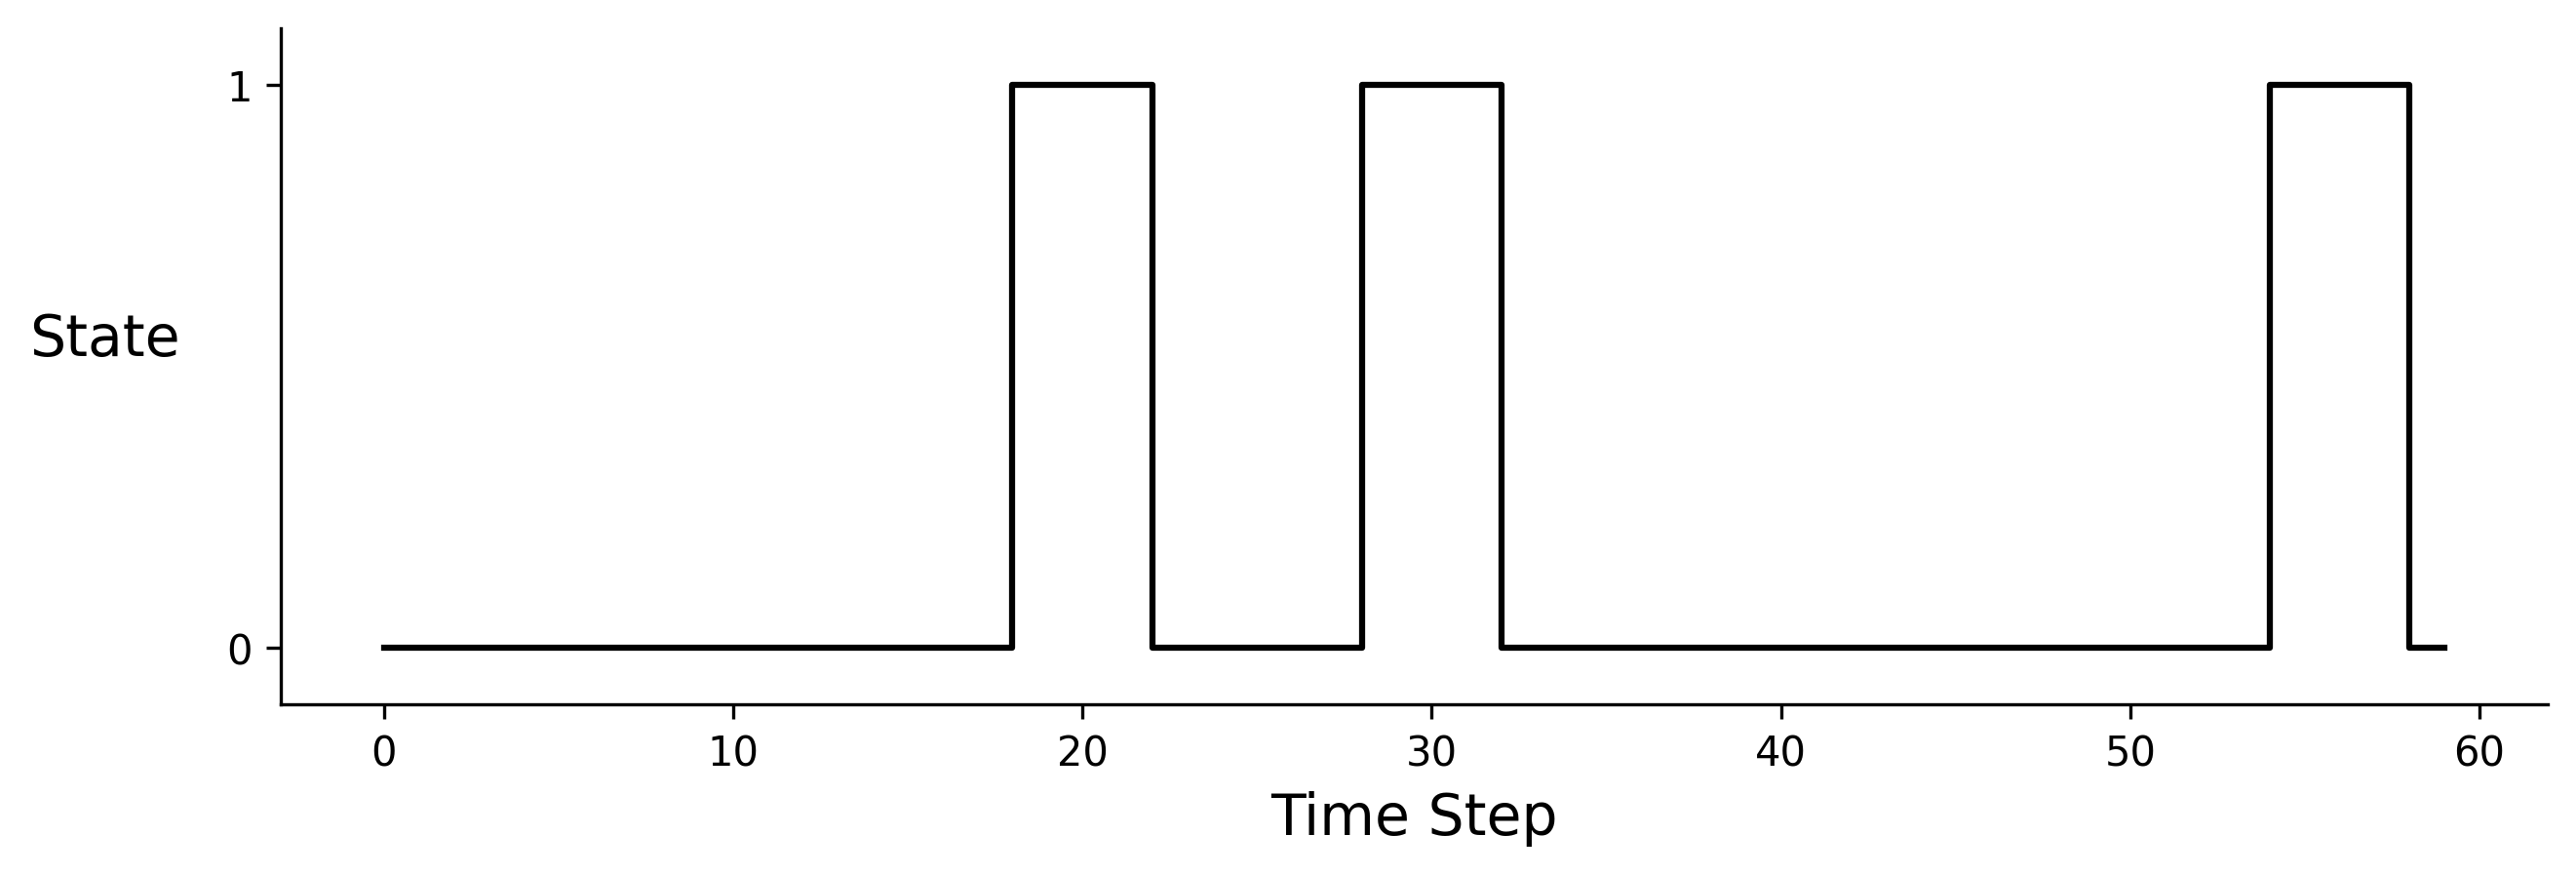

In [610]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
timesteps = 60
alpha = 0.1  # Chance of switching
k = 5        # Maximum number of consecutive 1s
y = 4        # Number of additional 0s to follow a sampled 0

# Initialize the time series
time_series = np.zeros(timesteps)
current_state = 0
consecutive_ones = 0  # Counter for consecutive ones
additional_zeros = 0  # Counter for additional zeros to follow a sampled 0
samples = []  # Store indices where a switch happens

# Generate the time series
for t in range(1, timesteps):
    if current_state == 1:
        consecutive_ones += 1
    else:
        consecutive_ones = 0

    if additional_zeros > 0:
        current_state = 0
        additional_zeros -= 1
    elif np.random.rand() < alpha or consecutive_ones >= k:
        samples.append(t)  # Mark the sample
        current_state = 1 - current_state  # Switch state
        if current_state == 0:
            additional_zeros = y
        else:
            consecutive_ones = 1

    time_series[t] = current_state

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))
plt.step(range(timesteps), time_series, where='post', color='black')
# plt.scatter(samples, time_series[samples], color='red', marker='x', s=50)  # Mark the samples with an 'x'
plt.xlabel('Time Step', rotation=0, fontsize=14)
plt.ylabel('State', rotation=0, labelpad=30, fontsize=14)
plt.yticks([0, 1])
plt.ylim(-0.1, 1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()



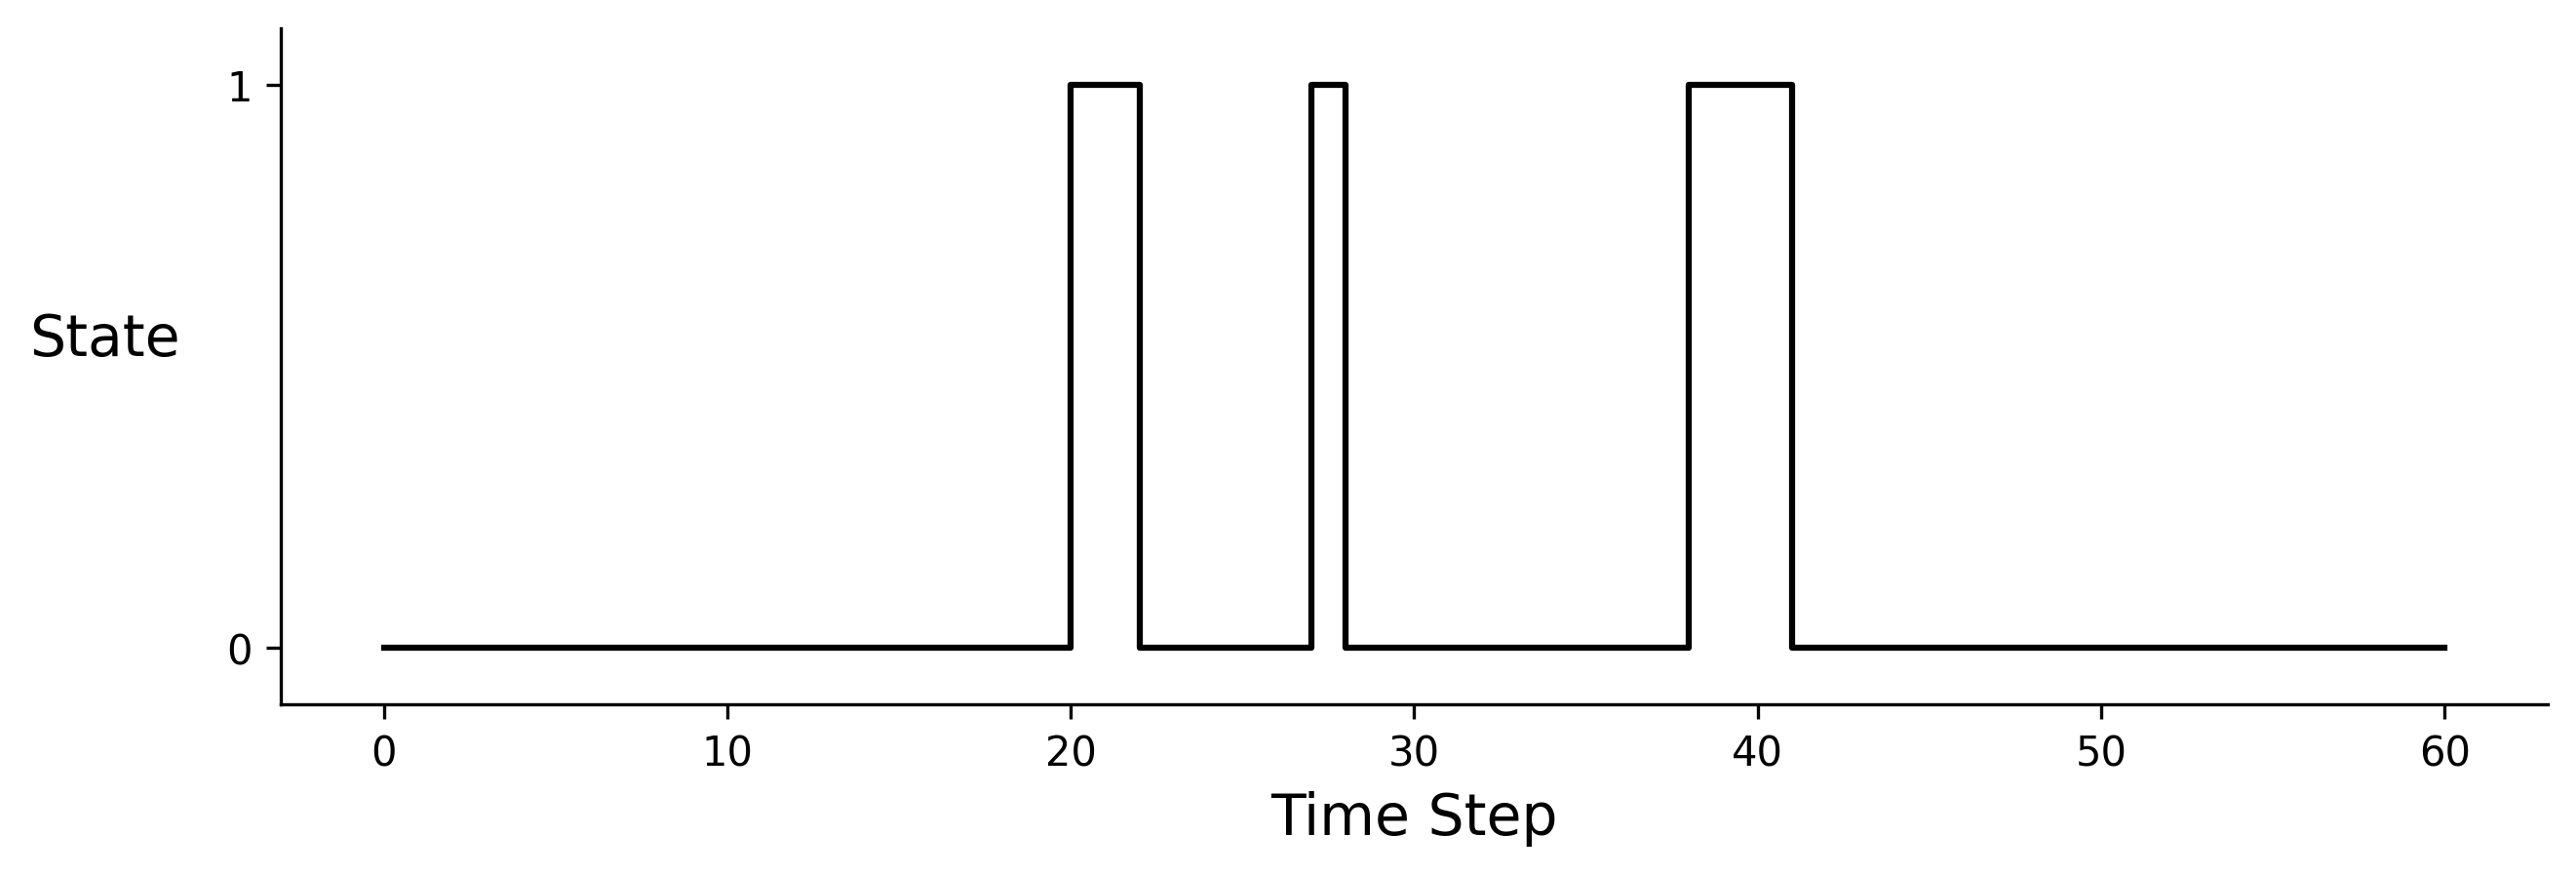

In [619]:
zeros = [0,0,0,0,0]
ts = [zeros,zeros,zeros,zeros,[1],[1],zeros,[1],zeros,zeros,[1],[1],[1],zeros,zeros,zeros,zeros]
fts = np.array([item for sublist in ts for item in sublist])


fig, ax = plt.subplots(figsize=(10, 3))
plt.step(range(len(fts)), fts, where='post', color='black')
# plt.scatter(samples, time_series[samples], color='red', marker='x', s=50)  # Mark the samples with an 'x'
plt.xlabel('Time Step', rotation=0, fontsize=14)
plt.ylabel('State', rotation=0, labelpad=30, fontsize=14)
plt.yticks([0, 1])
plt.ylim(-0.1, 1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

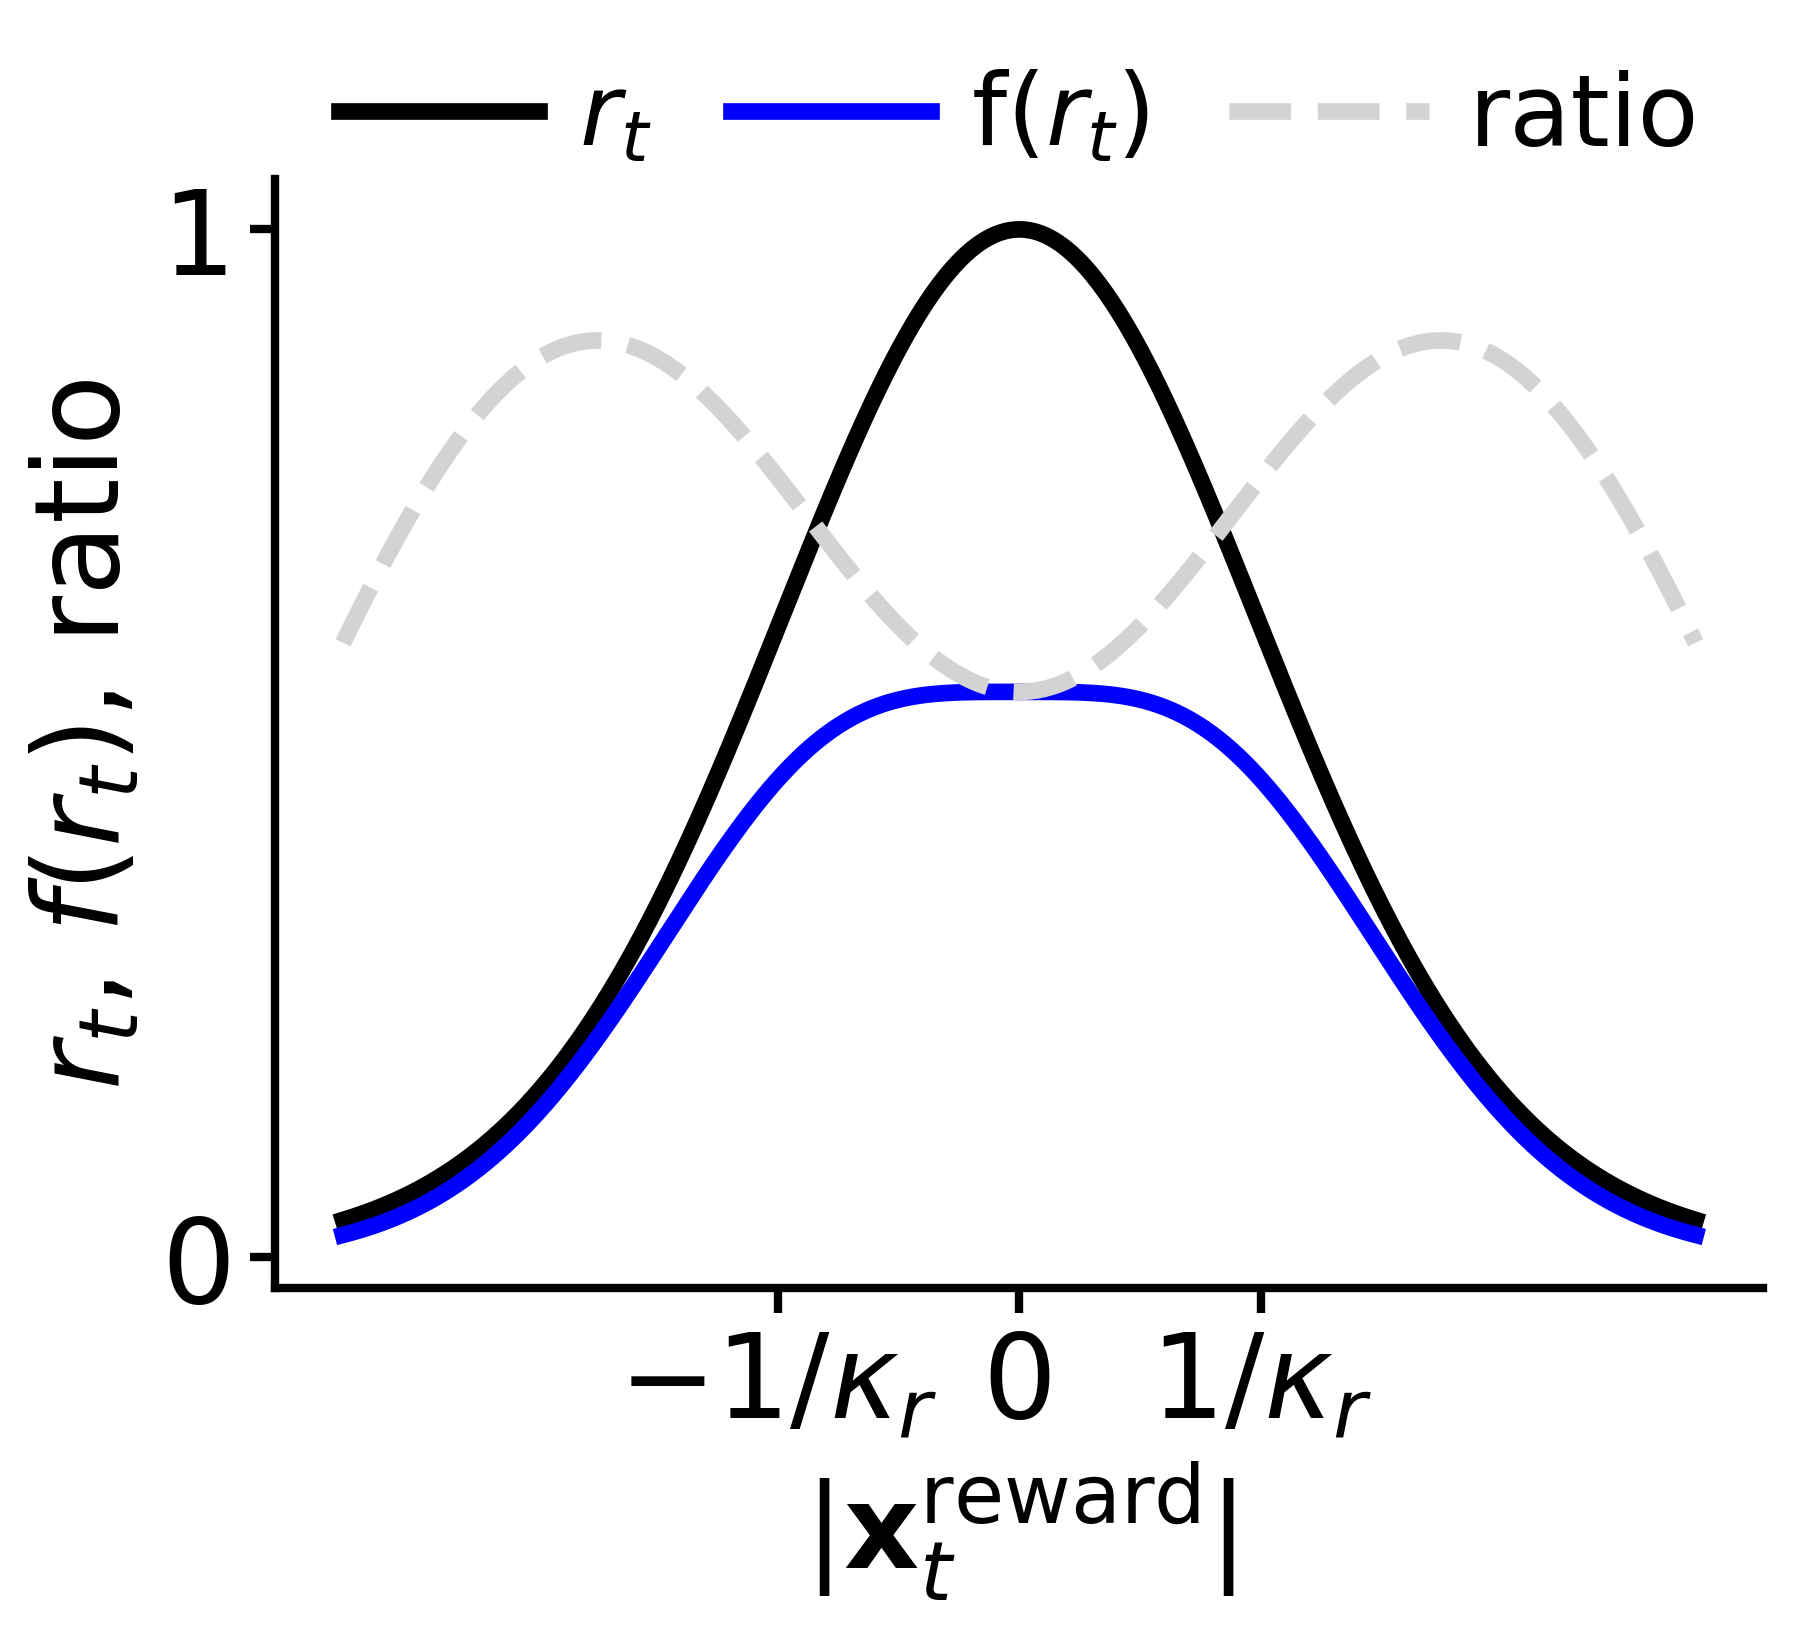

In [1006]:
import matplotlib.pyplot as plt
import numpy as np

# Constants for the functions
alpha = 1.1
beta = -0.55
sigma = 0.5

# Define the functions f and g
f = lambda x: np.exp(-x**2 / (2 * sigma**2))
g = lambda x: alpha * f(x) + beta * f(x)**2
h = lambda x: np.exp((1/sigma**2)*(np.cos(x) - 1))
i = lambda x: 1/(h(x) / g(x))

# Generate a range of x values
x = np.linspace(-2.8*sigma, 2.8*sigma, 400)
# x = np.linspace(-5*sigma, 5*sigma, 400)

# Create the plot
fig, ax1 = plt.subplots()

# Plot f and g
ax1.plot(x, h(x), 'k', label='$r_t$', linewidth=4)  # Plotting h in black
ax1.plot(x, g(x), 'b', label='f($r_t$)', linewidth=4)  # Plotting g in blue
ax1.plot(x, i(x), 'lightgrey', linestyle='dashed', label='ratio', linewidth=4)  # Plotting i in dashed grey

# Set ticks at y=1, x=0, and x = +/- sigma with sigma labels
ax1.set_xticks([-sigma, 0, sigma])
ax1.set_xticklabels(['$-\sigma$', '0', '$\sigma$'], fontsize=14)
ax1.set_yticks([1])
ax1.set_yticklabels(['1'], fontsize=14)

# Only show the bottom and left axes
ax1.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('none')  # Right spine is invisible but still exists for adding a new axis
ax1.spines['top'].set_visible(False)

fnt= 28
# Add a second y-axis to the right side
# ax2 = ax1.twinx()
# ax2.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(False)
# ax2.spines['right'].set_position(('outward', 10))
ax1.set_yticks([0,1])  # Set the same y-ticks as the left y-axis
ax1.set_yticklabels(['0','1'], fontsize=fnt)
ax1.tick_params(left=True)
ax1.set_xticks([-sigma, 0, sigma])
ax1.set_xticklabels(['$-1/\kappa_r$', '0', '$1/\kappa_r$'], fontsize=fnt)

# ax2.set_yticks([1])  # Set the same y-ticks as the left y-axis
# ax2.tick_params(right=True)

# Set the limit for y to visualize the ticks properly
ax1.set_ylim(bottom=-0.03)
# ax2.set_ylim(ax1.get_ylim())  # Set the same y limits for the right y-axis

# Label the axes
ax1.set_xlabel('$|\mathbf{x}_t^{\mathrm{reward}}|$', fontsize=fnt)
ax1.set_ylabel('$r_t$, $f(r_t)$, ratio', color='k', fontsize=fnt)
# ax2.set_ylabel('$f(r_t)$', color='b', rotation=0, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=fnt, length=6, width=2)

# Include a legend
ax1.legend(loc='upper center', fontsize=24, frameon=False, ncol=3, bbox_to_anchor=(0.5, 1.18), handletextpad=0.4, columnspacing=0.8)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)

# Show the plot
plt.show()

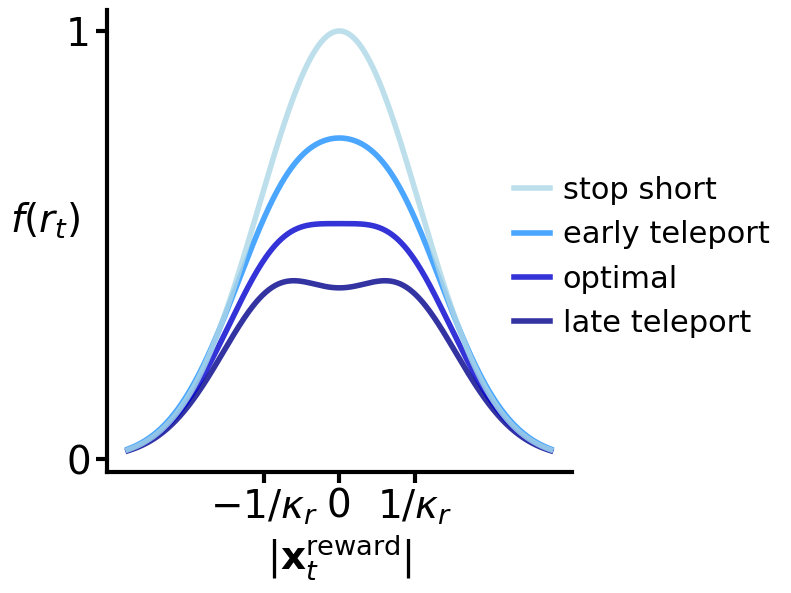

In [147]:
import matplotlib.pyplot as plt
import numpy as np

clrs=['#ADD8E6', '#1E90FF', '#0000CD', '#00008B']

# Constants for the functions
# sigma = 0.5
alpha_c = 1.1
beta_c = -0.55

alpha_s = 1.1
beta_s = -0.1
alpha_e = 1.2
beta_e = -0.45
alpha_n = 1.0
beta_n = -0.6

# Define the functions f and g
f = lambda x: np.exp(-x**2 / (2 * sigma**2))
# h = lambda x: np.exp((1/sigma**2)*(np.cos(x) - 1))
# i = lambda x: 1/(h(x) / g(x))
g_c = lambda x: alpha_c * f(x) + beta_c * f(x)**2
g_s = lambda x: alpha_s * f(x) + beta_s * f(x)**2
g_e = lambda x: alpha_e * f(x) + beta_e * f(x)**2
g_n = lambda x: alpha_n * f(x) + beta_n * f(x)**2

# Generate a range of x values
x = np.linspace(-2.8*sigma, 2.8*sigma, 400)
# x = np.linspace(-5*sigma, 5*sigma, 400)

# Create the plot
fig, ax1 = plt.subplots(figsize=(6,6))

aa = 0.8

# Plot f and g
# ax1.plot(x, h(x), 'k', label='$r_t$', linewidth=4)  # Plotting h in black
# ax1.plot(x, i(x), 'lightgrey', linestyle='dashed', label='ratio', linewidth=4)  # Plotting i in dashed grey
pn, = ax1.plot(x, g_n(x), c=clrs[3], label='late teleport', linewidth=4, alpha=aa)  # Plotting g in blue
pc, = ax1.plot(x, g_c(x), c=clrs[2], label='optimal', linewidth=4, alpha=aa)  # Plotting g in blue
pe, = ax1.plot(x, g_e(x), c=clrs[1], label='early teleport', linewidth=4, alpha=aa)  # Plotting g in blue
ps, = ax1.plot(x, g_s(x), c=clrs[0], label='stop short', linewidth=4, alpha=aa)  # Plotting g in blue


# Set ticks at y=1, x=0, and x = +/- sigma with sigma labels
ax1.set_xticks([-sigma, 0, sigma])
ax1.set_xticklabels(['$-\sigma$', '0', '$\sigma$'], fontsize=14)
ax1.set_yticks([1])
ax1.set_yticklabels(['1'], fontsize=14)

# Only show the bottom and left axes
ax1.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_color('none')  # Right spine is invisible but still exists for adding a new axis
ax1.spines['top'].set_visible(False)

fnt= 28
# Add a second y-axis to the right side
# ax2 = ax1.twinx()
# ax2.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(False)
# ax2.spines['right'].set_position(('outward', 10))
ax1.set_yticks([0,1])  # Set the same y-ticks as the left y-axis
ax1.set_yticklabels(['0','1'], fontsize=fnt)
ax1.tick_params(left=True)
ax1.set_xticks([-sigma, 0, sigma])
ax1.set_xticklabels(['$-1/\kappa_r$', '0', '$1/\kappa_r$'], fontsize=fnt)

# ax2.set_yticks([1])  # Set the same y-ticks as the left y-axis
# ax2.tick_params(right=True)

# Set the limit for y to visualize the ticks properly
ax1.set_ylim(bottom=-0.03)
# ax2.set_ylim(ax1.get_ylim())  # Set the same y limits for the right y-axis

# Label the axes
ax1.set_xlabel('$|\mathbf{x}_t^{\mathrm{reward}}|$', fontsize=fnt)
ax1.set_ylabel('$f(r_t)$', color='k', fontsize=fnt, rotation=0, labelpad=15)
# ax2.set_ylabel('$f(r_t)$', color='b', rotation=0, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=fnt, length=8, width=3)

# Include a legend
handles, labels = plt.gca().get_legend_handles_labels()
handles[0], handles[1], handles[2], handles[3] = handles[3], handles[2], handles[1], handles[0]
labels[0], labels[1], labels[2], labels[3] = labels[3], labels[2], labels[1], labels[0]

ax1.legend(handles, labels, loc='upper center', fontsize=22, frameon=False, ncol=1, bbox_to_anchor=(1.15, 0.7), handletextpad=0.4, columnspacing=0.8, handlelength=1.2)
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)

# Show the plot
plt.show()

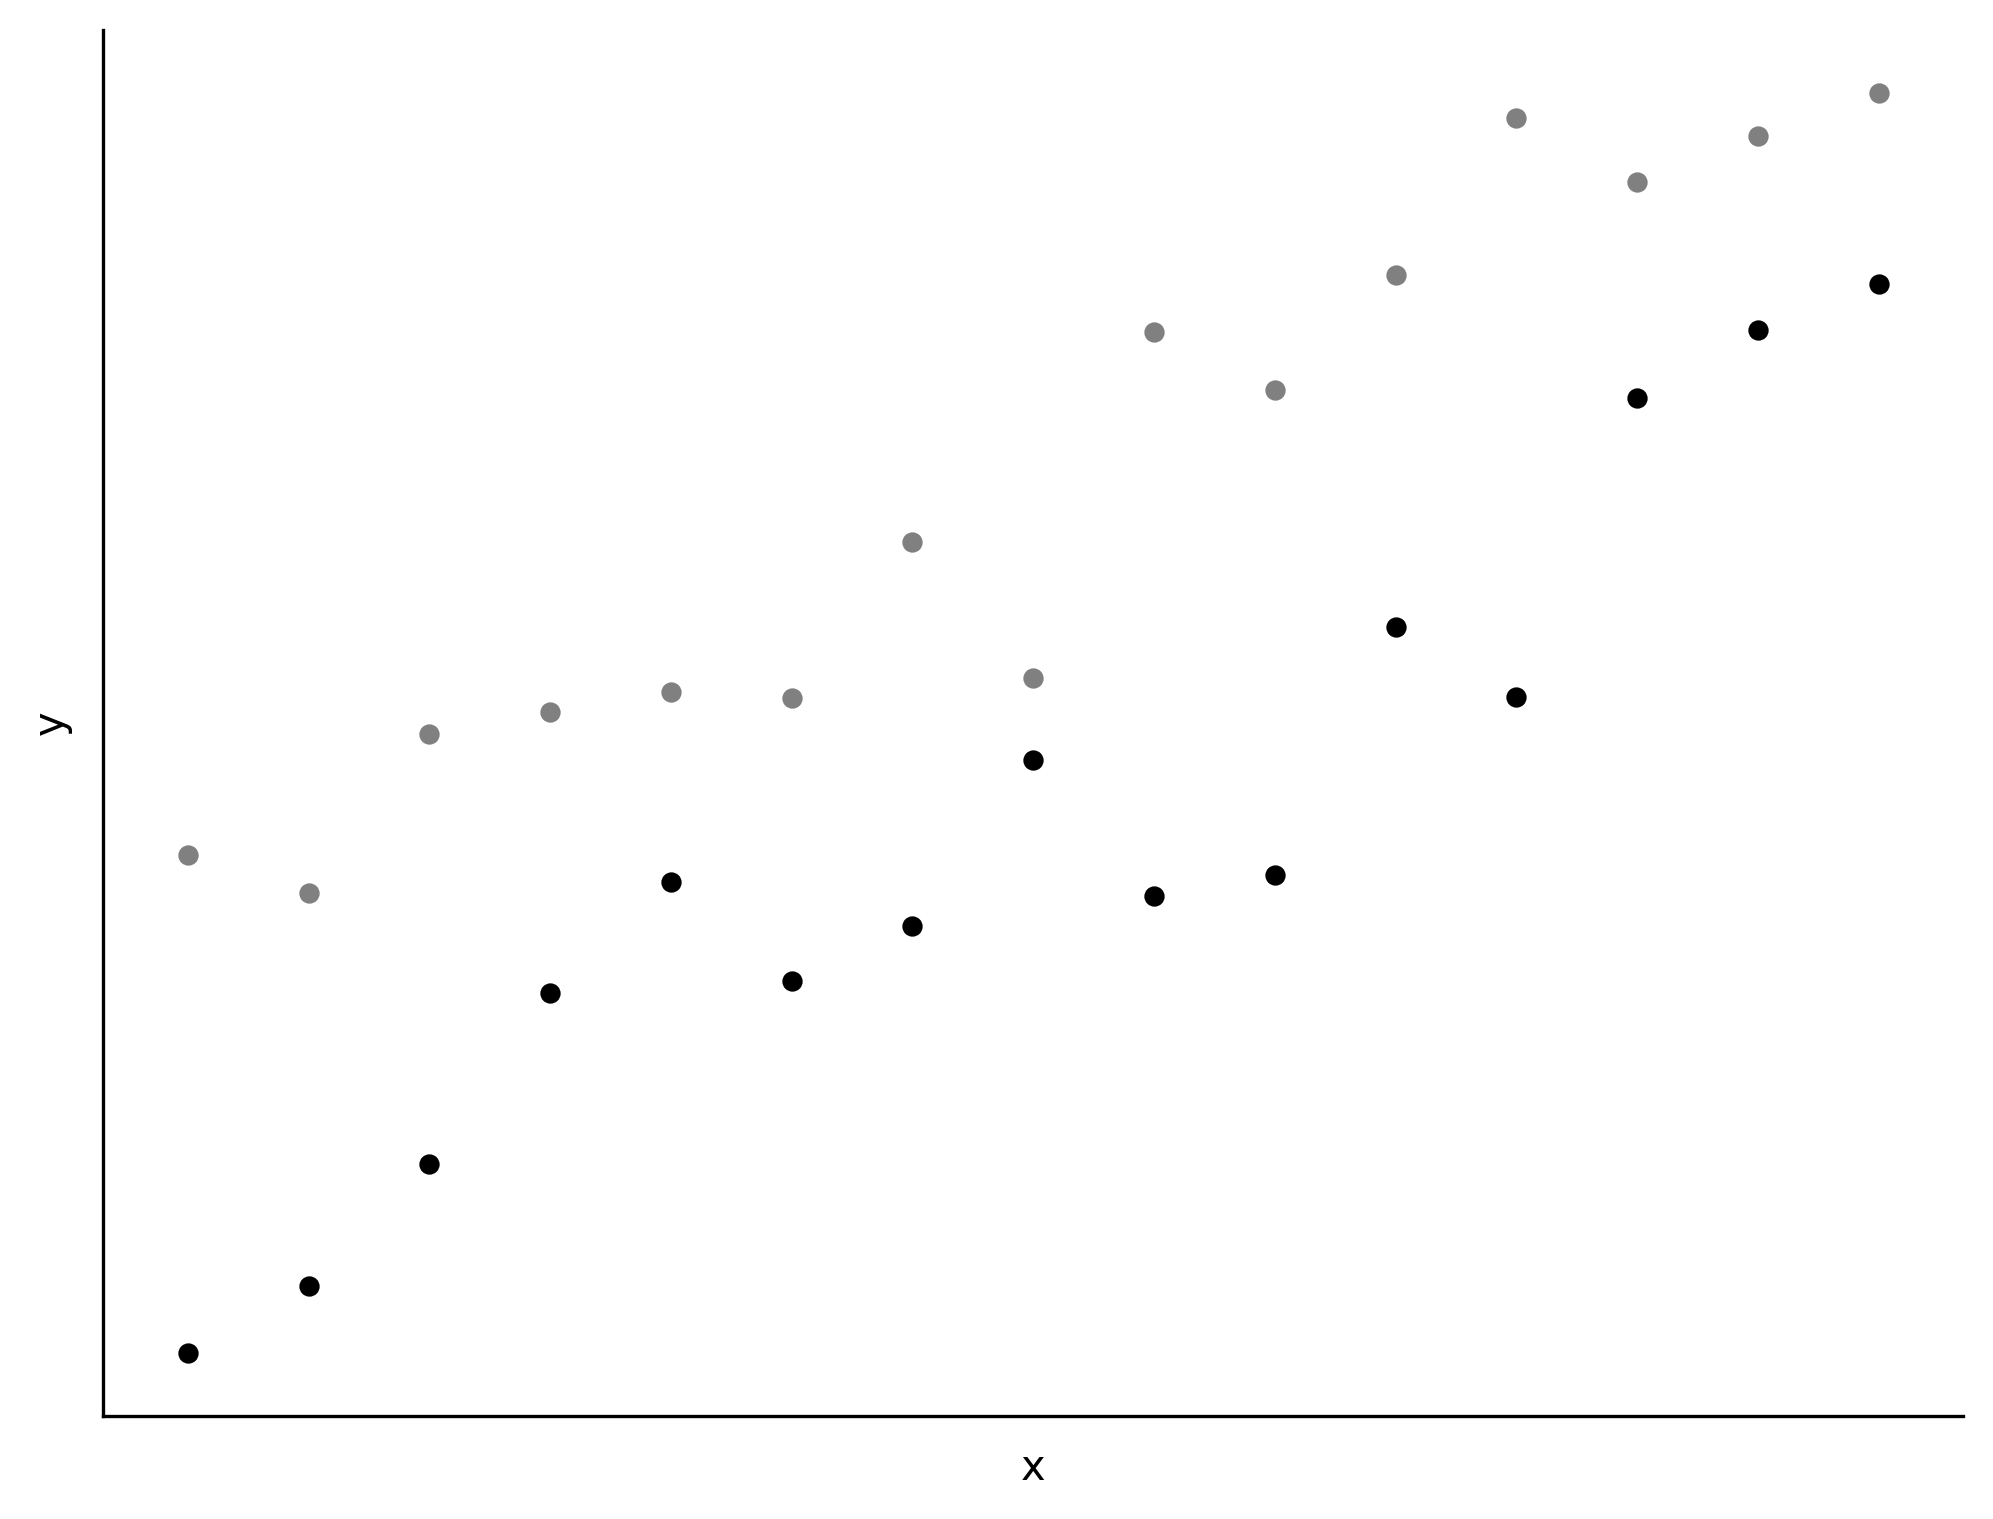

In [789]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
m = 1  # slope
b1 = 0 # y-intercept for the first set of points
b2 = 3.5  # y-intercept for the second set of points
num_points = 15
x_range = np.linspace(0, 10, num_points)

# Generating points
x1 = x_range
y1 = m * x1 + b1 + np.random.normal(0, 1, num_points)

x2 = x_range
y2 = m * x2 + b2 + np.random.normal(0, 1, num_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color='black', s=15)  # Smaller scatter points
ax.scatter(x2, y2, color='black', s=15)  # Smaller scatter points
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove all ticks
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()


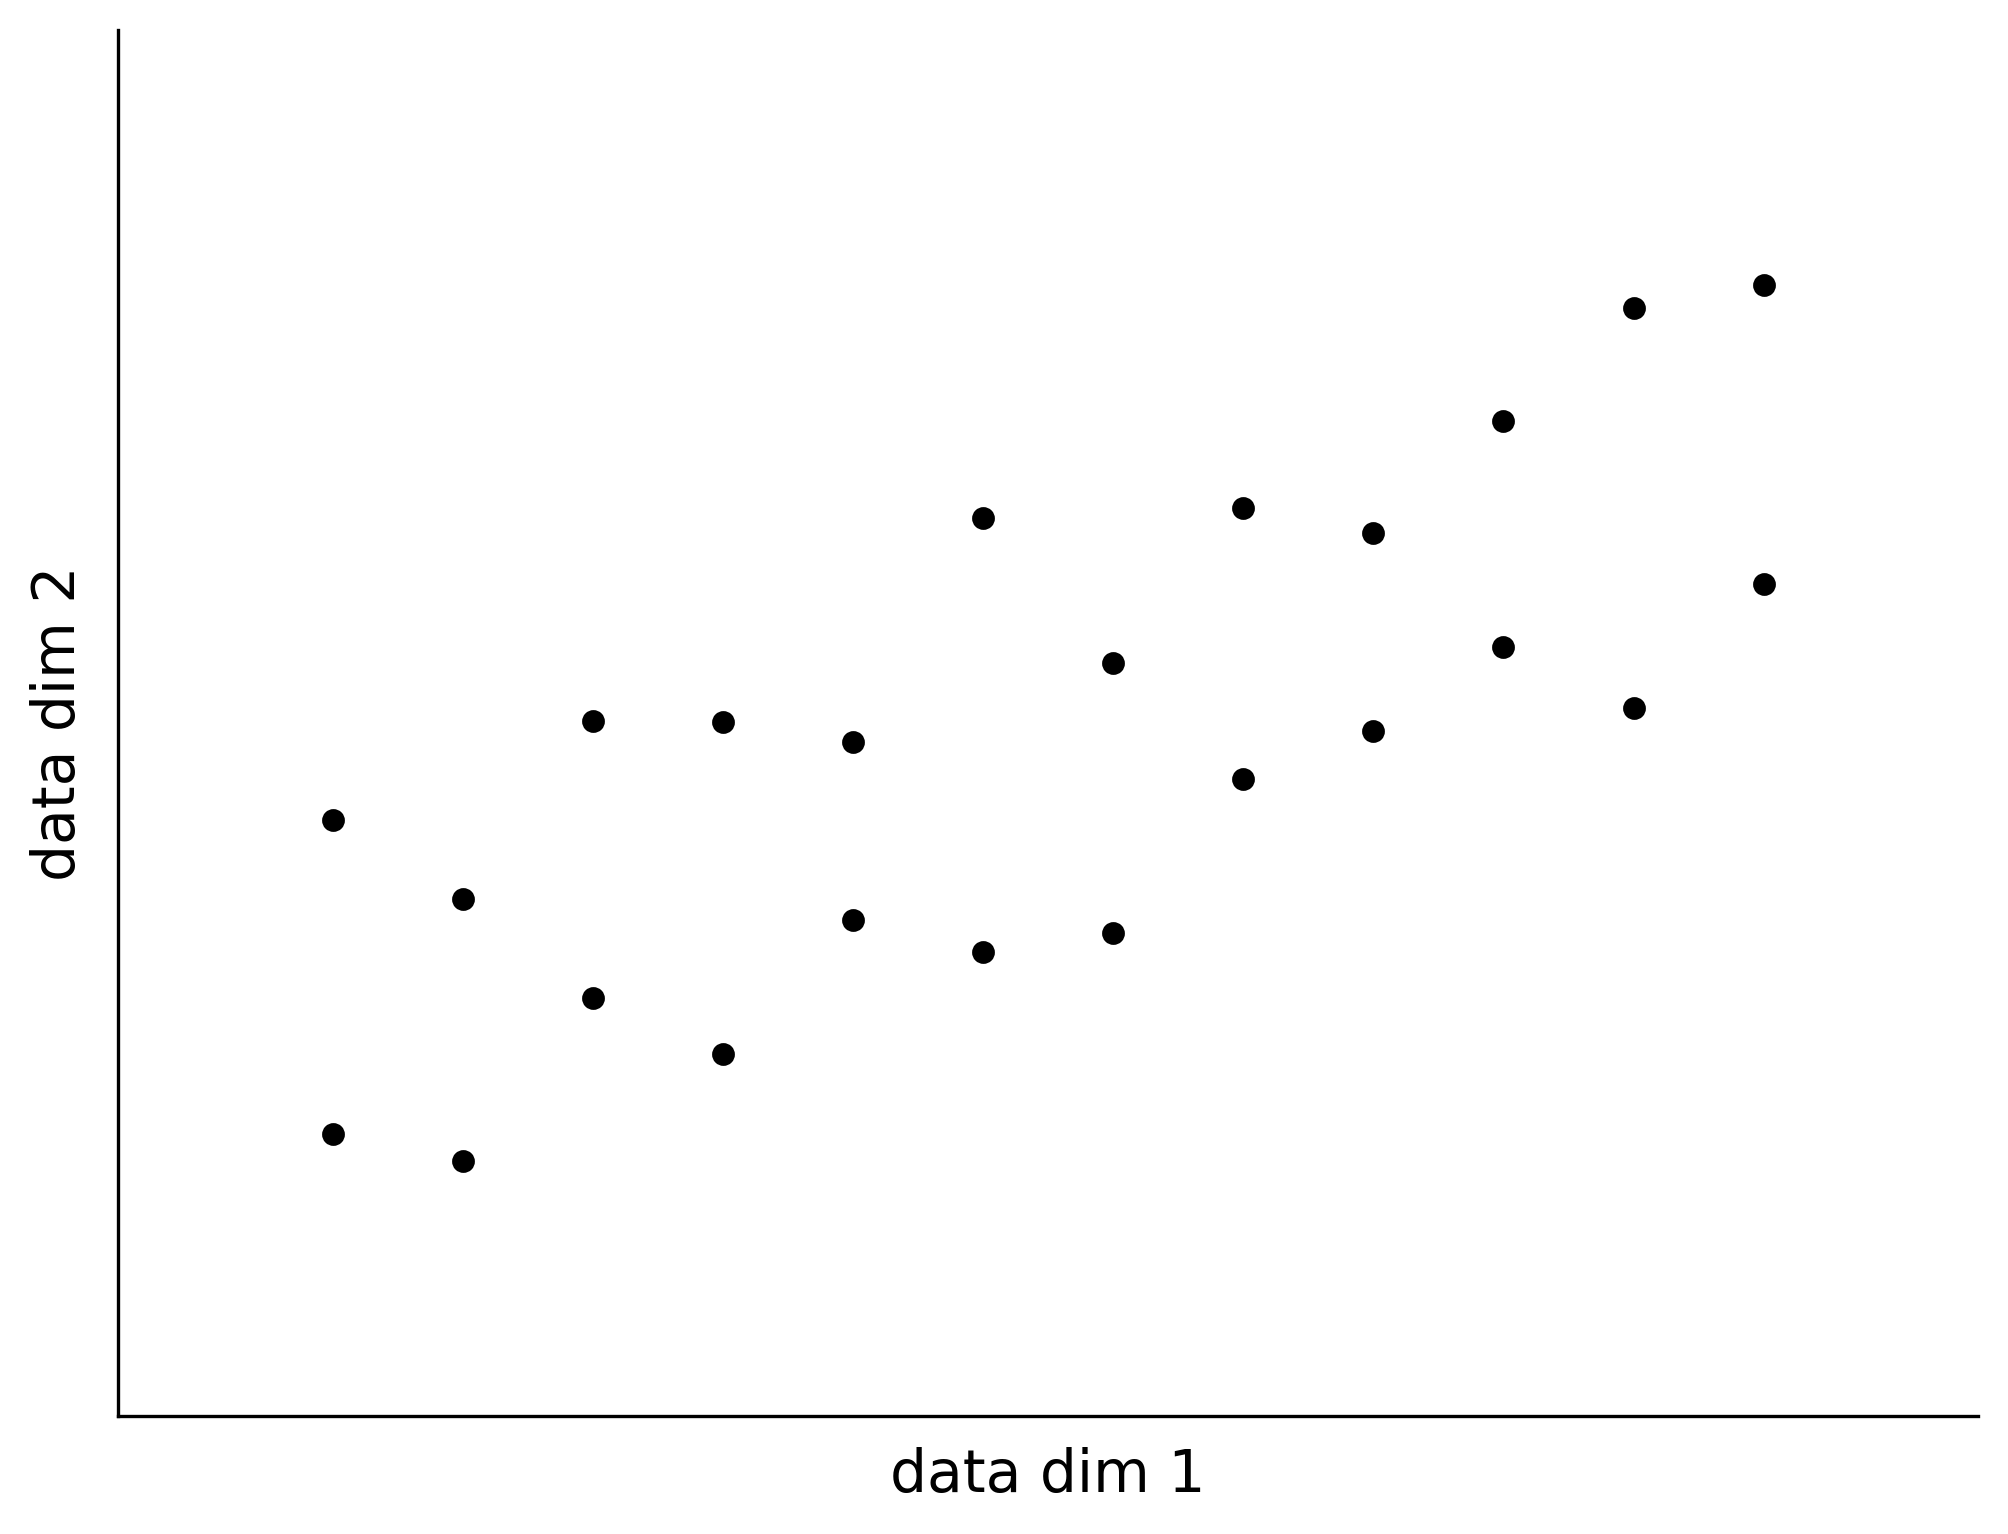

In [863]:
import matplotlib.pyplot as plt
import numpy as np

# # Parameters
# m = 1  # slope
# b1 = 0 # y-intercept for the first set of points
# b2 = 3.5  # y-intercept for the second set of points
# num_points = 15
# x_range = np.linspace(0, 10, num_points)

# # Generating points
# x1 = x_range
# y1 = m * x1 + b1 + np.random.normal(0, 1, num_points)

# x2 = x_range
# y2 = m * x2 + b2 + np.random.normal(0, 1, num_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color='black', s=20)  # Smaller scatter points
ax.scatter(x2, y2, color='black', s=20)  # Smaller scatter points
ax.set_xlabel('data dim 1', fontsize=14)
ax.set_ylabel('data dim 2', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove all ticks
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

padding_x = 1.5  # Adjust the padding value as needed
padding_y = 5  # Adjust the padding value as needed
ax.set_xlim(min(x_range) - padding_x, max(x_range) + padding_x)
ax.set_ylim(min(np.concatenate([y1, y2])) - padding_y, max(np.concatenate([y1, y2])) + padding_y)

plt.show()


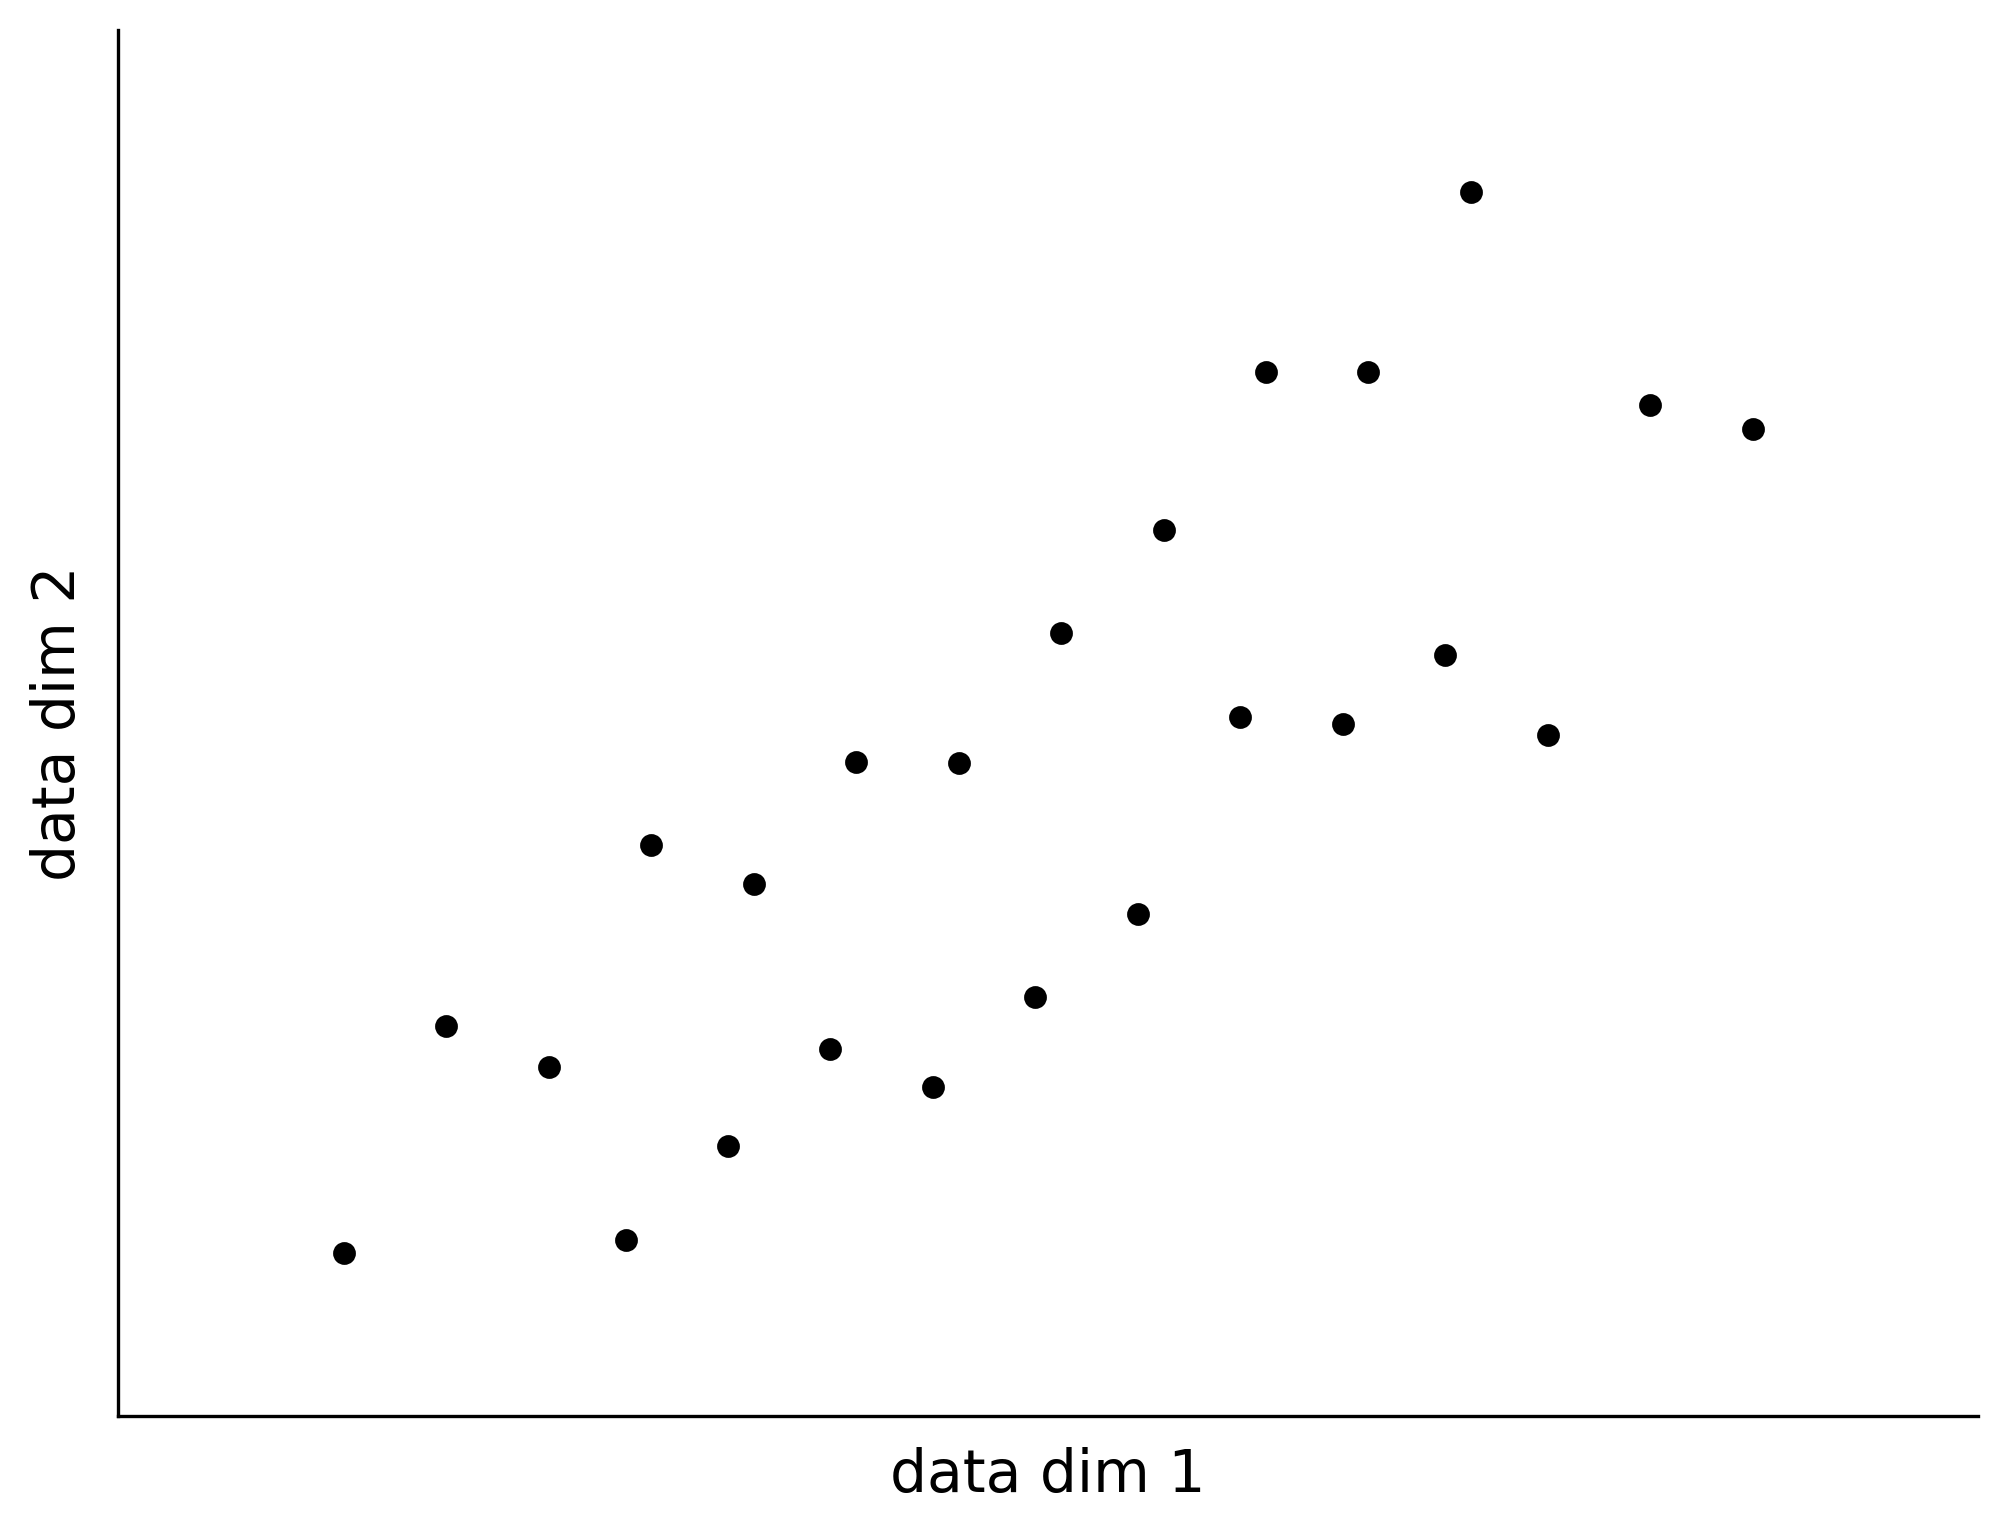

In [937]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
m = 1  # slope
b1 = 4 # y-intercept for the first set of points
b2 = -4  # y-intercept for the second set of points
num_points = 12
x_range = np.linspace(-10, 10, num_points)
s1 = 10  # Size for the first point
s2 = 50  # Size for the last point
x_shift = -5  # Shift for x1 points
padding_x = 4
padding_y = 4
sig=1.6

# # Generating points
# x1 = x_range + x_shift
# y1 = m * x1 + b1 + sigma*np.random.normal(0, 1, num_points)

# x2 = x_range
# y2 = m * (x2) + b2 + sigma*np.random.normal(0, 1, num_points)

# # Varying the marker sizes
# sizes = np.linspace(s1, s2, num_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color='black', s=20)
ax.scatter(x2, y2, color='black', s=20)
ax.set_xlabel('data dim 1', fontsize=14)
ax.set_ylabel('data dim 2', fontsize=14)

# Add padding to the axes
all_x = np.concatenate([x1, x2])  # Combine all x values
all_y = np.concatenate([y1, y2])  # Combine all y values
ax.set_xlim(min(all_x) - padding_x, max(all_x) + padding_x)
ax.set_ylim(min(all_y) - padding_y, max(all_y) + padding_y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove all ticks
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()


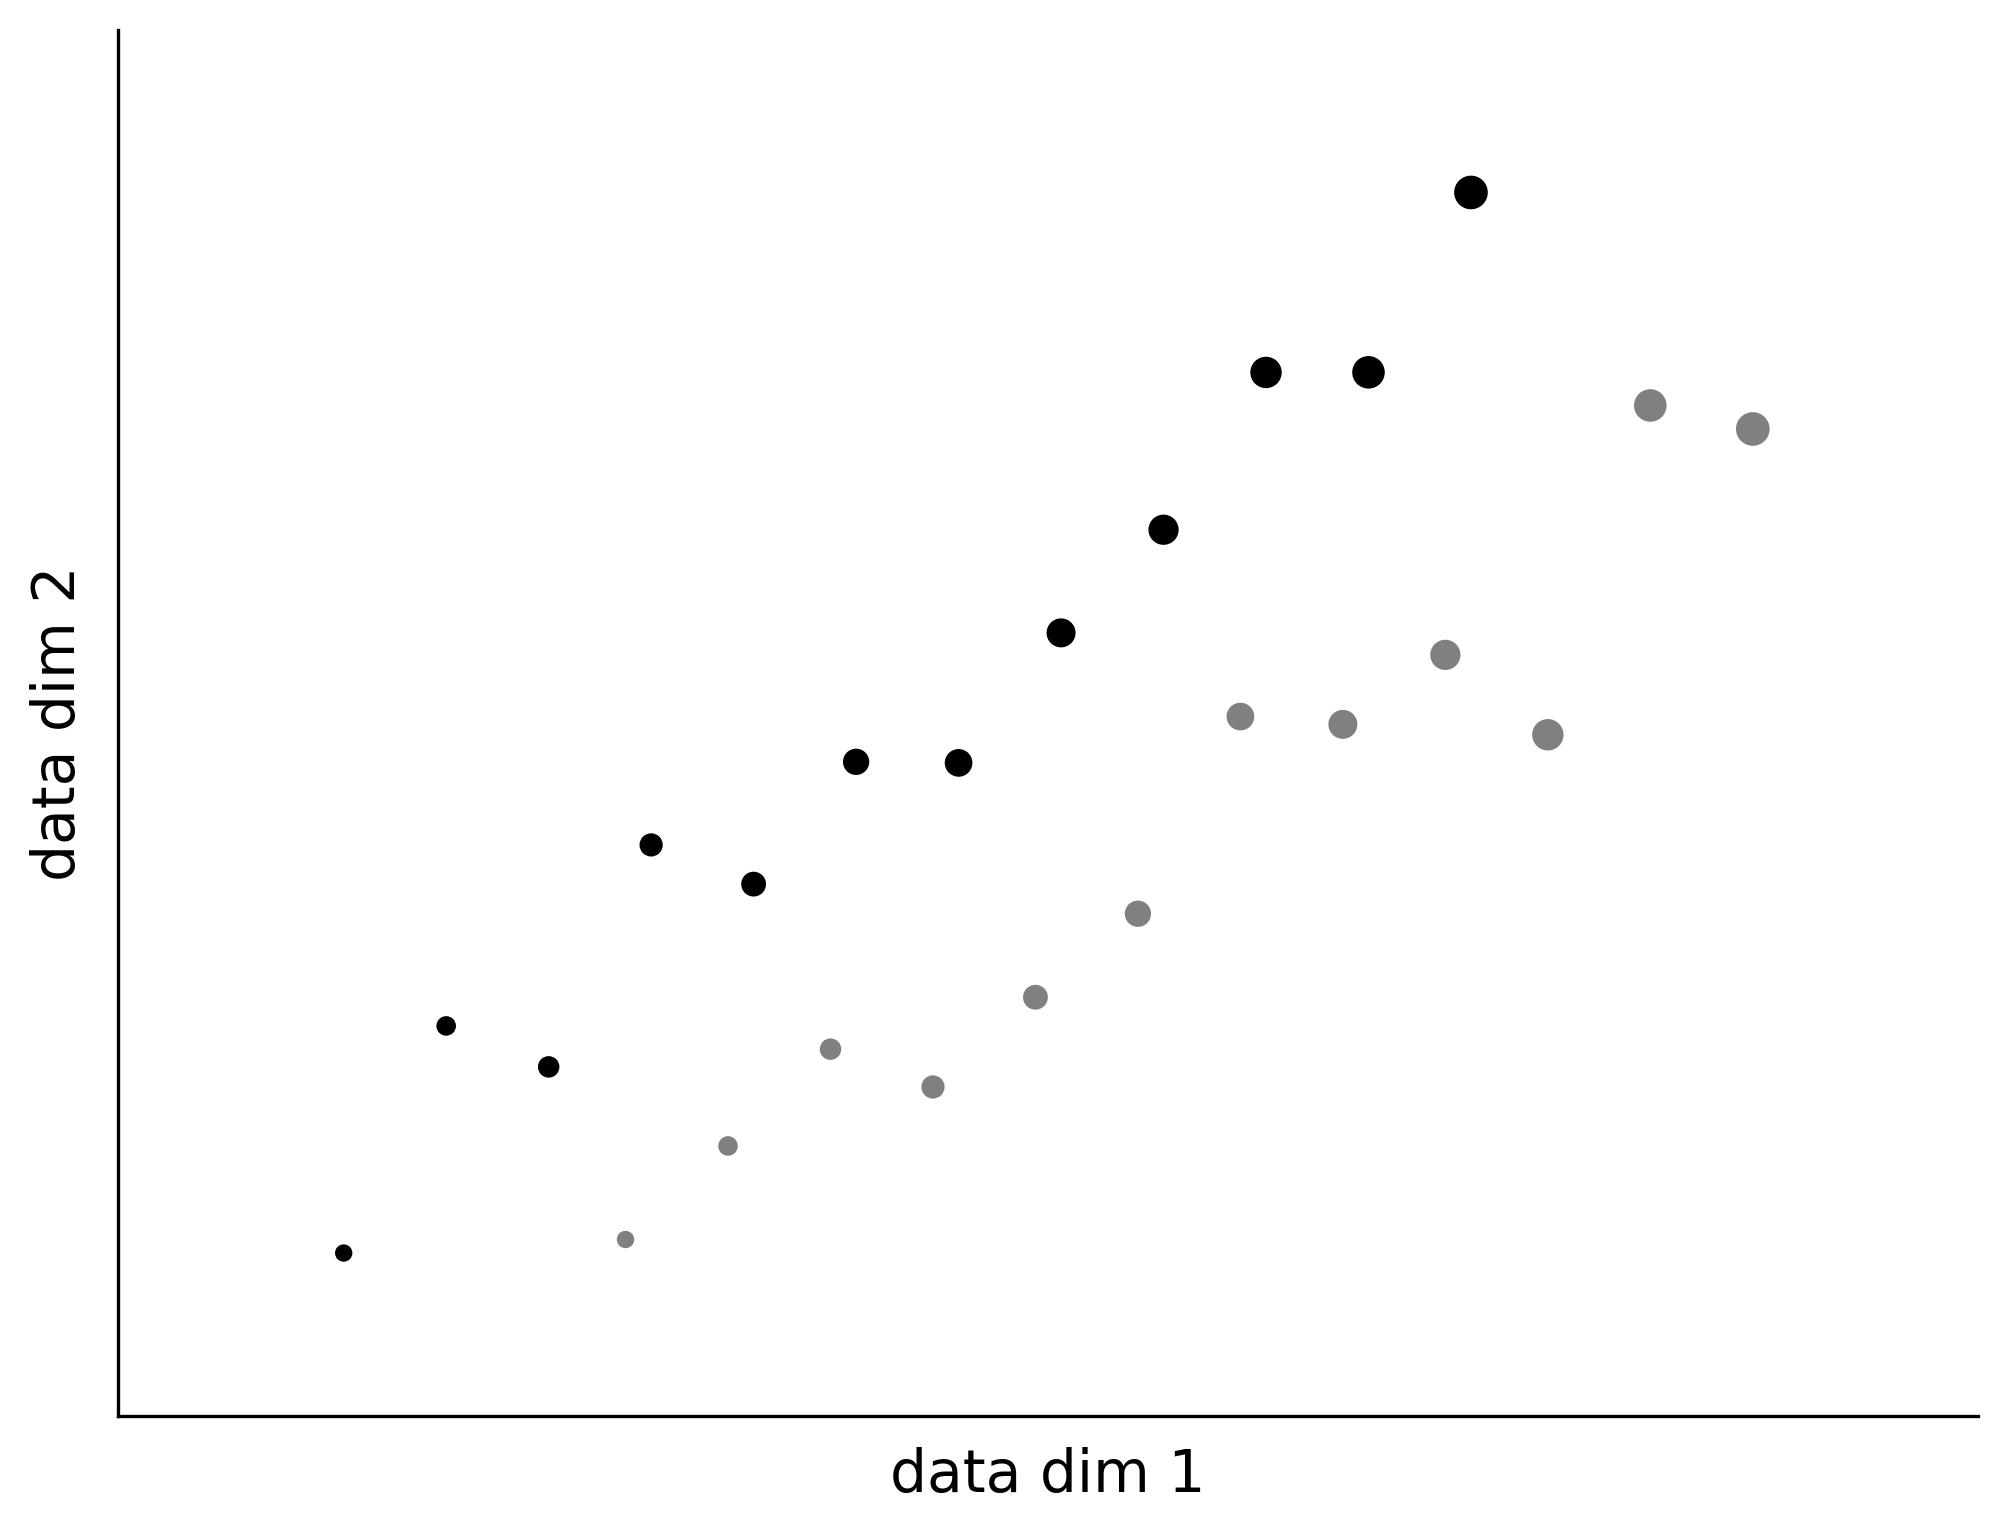

In [936]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
m = 1  # slope
b1 = 4 # y-intercept for the first set of points
b2 = -4  # y-intercept for the second set of points
num_points = 12
x_range = np.linspace(-10, 10, num_points)
s1 = 10  # Size for the first point
s2 = 50  # Size for the last point
x_shift = -5  # Shift for x1 points
padding_x = 4
padding_y = 4
sig=1.6

# # Generating points
# x1 = x_range + x_shift  # Apply offset to x1
# y1 = m * x1 + b1 + sig*np.random.normal(0, 1, num_points)
# x2 = x_range
# y2 = m * x2 + b2 + sig*np.random.normal(0, 1, num_points)

# Varying the marker sizes
sizes = np.linspace(s1, s2, num_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color='black', s=sizes)
ax.scatter(x2, y2, color='grey', s=sizes)
ax.set_xlabel('data dim 1', fontsize=14)
ax.set_ylabel('data dim 2', fontsize=14)

# Add padding to the axes
all_x = np.concatenate([x1, x2])  # Combine all x values
all_y = np.concatenate([y1, y2])  # Combine all y values
ax.set_xlim(min(all_x) - padding_x, max(all_x) + padding_x)
ax.set_ylim(min(all_y) - padding_y, max(all_y) + padding_y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove all ticks
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
